# Imports

In [488]:
import pandas as pd
import sys
sys.path.append(r"C:\Users\silvh\OneDrive\lighthouse\custom_python")
from silvhua import *
import seaborn as sns
import matplotlib.pyplot as plt
from silvhua_plot import *
from PIL import Image
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LassoCV

# load data

In [586]:
path = r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\data'
df_fw = load_csv('data_freeweight_corrected.csv',path, column1_as_index=False)
print(df_fw.shape)
df_fw.head()

Dataframe shape:  (52, 15)
(52, 15)


Age  Mass  Height  Load20%1RM  Load40%1RM  Load60%1RM  Load80%1RM  \
0   22  77.8   175.0        39.0          78       114.0       156.0   
1   21  71.6   179.0        24.0          48        72.0        96.0   
2   19  60.8   165.0        26.0          52        78.0       104.0   
3   21  58.4   172.0        20.0          40        60.0        80.0   
4   20  82.3   185.0        30.0          60        90.0       120.0   

   Load90%1RM  Load-1RM-1  20% MV  40%MV  60%MV  80%MV  90%MV  100%MV  
0       175.0       190.0    1.05   0.91   0.76   0.52   0.39    0.26  
1       108.0       120.0    1.03   0.91   0.68   0.49   0.39    0.27  
2       117.0       130.0    1.06   0.92   0.76   0.51   0.37    0.26  
3        90.0       100.0    0.97   0.85   0.68   0.50   0.38    0.26  
4       135.0       150.0    1.02   0.92   0.76   0.50   0.40    0.29

In [93]:
df_sm = load_csv('data_sm.csv',path, column1_as_index=False)
df_sm.head()

Dataframe shape:  (52, 15)


Age  Mass  Height  Load20%1RM  Load40%1RM  Load60%1RM  Load80%1RM  \
0   22  77.8   175.0        42.0          84       126.0       168.0   
1   21  71.6   179.0        30.0          60        90.0       120.0   
2   19  60.8   165.0        30.0          60        90.0       120.0   
3   21  58.4   172.0        24.0          48        72.0        96.0   
4   20  82.3   185.0        35.0          70       105.0       140.0   

   Load90%1RM  Load-1RM-1  20% MV  40%MV  60%MV  80%MV  90%MV  100%MV  
0       189.0       210.0    1.05   0.92   0.72   0.51   0.40    0.28  
1       135.0       150.0    1.06   0.90   0.67   0.50   0.38    0.26  
2       135.0       150.0    1.09   0.92   0.74   0.48   0.36    0.24  
3       108.0       120.0    1.07   0.91   0.73   0.53   0.42    0.27  
4       157.5       175.0    1.03   0.91   0.70   0.51   0.38    0.29

In [3]:
df_fw.columns

Index(['Age', 'Mass', 'Height', 'Load20%1RM', 'Load40%1RM', 'Load60%1RM',
       'Load80%1RM', 'Load90%1RM', 'Load-1RM-1', '20% MV', '40%MV', '60%MV',
       '80%MV', '90%MV', '100%MV'],
      dtype='object')

In [6]:
velocity_columns = df_fw.columns[df_fw.columns.str.contains('MV')].to_list()
load_columns = df_fw.columns[df_fw.columns.str.contains('Load')].to_list()
velocity_columns+load_columns

['20% MV',
 '40%MV',
 '60%MV',
 '80%MV',
 '90%MV',
 '100%MV',
 'Load20%1RM',
 'Load40%1RM',
 'Load60%1RM',
 'Load80%1RM',
 'Load90%1RM',
 'Load-1RM-1']

# Archive: Initial EDA

In [20]:
pd.DataFrame(df_fw.loc[0]).transpose()

Age  Mass  Height  Load20%1RM  Load40%1RM  Load60%1RM  Load80%1RM  \
0  22.0  77.8   175.0        39.0        78.0       114.0       156.0   

   Load90%1RM  Load-1RM-1  20% MV  40%MV  60%MV  80%MV  90%MV  100%MV  
0       175.0       190.0    1.05   0.91   0.76   0.52   0.39    0.26

## Initial Data visualization (no longer relevant)

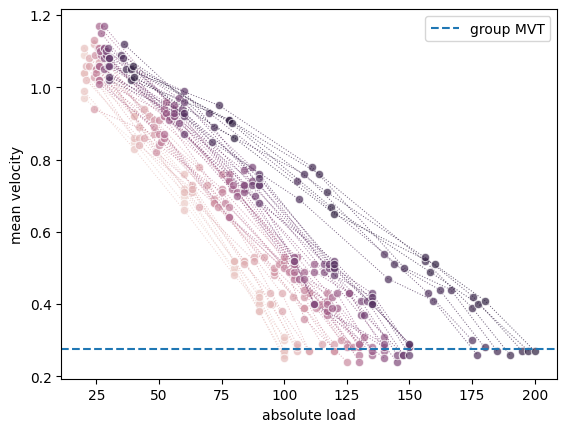

In [595]:
ax = sns.lineplot(data=reshape_group_df(df_fw), x='absolute load', y='mean velocity',
    hue='participant', alpha=.7,marker='o', size=0.5, ls=':',
    legend=False,# size='%1RM'
)
ax.axhline(y=df_fw['100%MV'].mean(),
    label='group MVT',ls='--')
ax.legend()

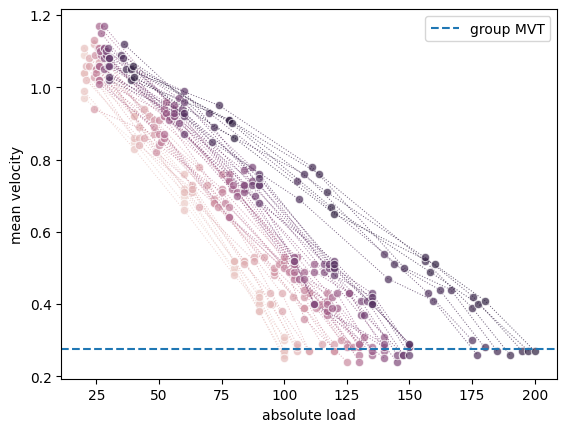

In [ ]:
# Size of marker represents %1RM
ax = sns.lineplot(data=reshape_group_df(df_fw), x='absolute load', y='mean velocity',
    hue='participant', alpha=.7,marker='o', size=0.5, ls=':',
    legend=False,# size='%1RM'
)
ax.axhline(y=df_fw['100%MV'].mean(),
    label='group MVT',ls='--')
ax.legend()

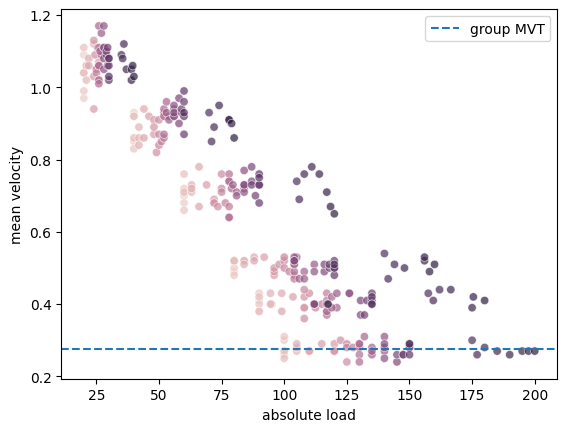

In [57]:

ax = sns.scatterplot(data=reshape_group_df(df_fw), x='absolute load', y='mean velocity',
    hue='participant', alpha=.7,
    legend=False, #size='%1RM'
)
ax.axhline(y=df_fw['100%MV'].mean(),
    label='group MVT',ls='--')
ax.legend()

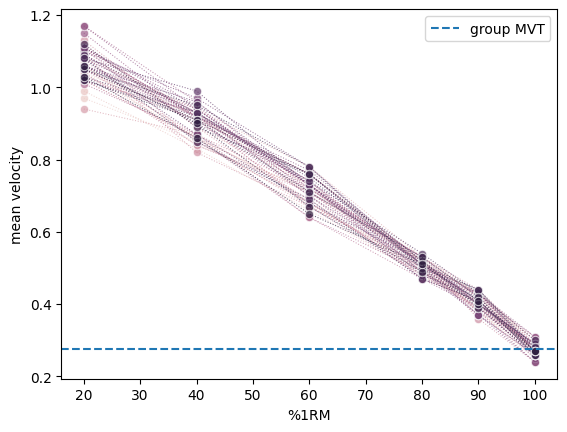

In [56]:
ax = sns.lineplot(data=reshape_group_df(df_fw), x='%1RM', y='mean velocity',
    alpha=0.7, marker='o', size=0.5,ls=':',
    hue='participant',legend=False
)

ax.axhline(y=df_fw['100%MV'].mean(),
    label='group MVT',ls='--')
ax.legend()

<AxesSubplot: xlabel='%1RM', ylabel='mean velocity'>

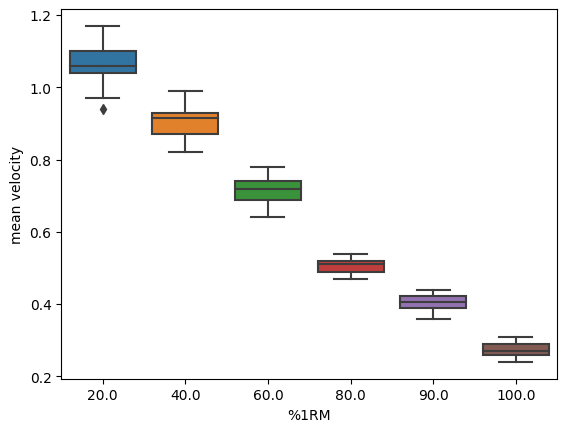

In [13]:
# Same as above but boxplot
sns.boxplot(data=reshape_group_df(df_fw), x='%1RM', y='mean velocity')

<AxesSubplot: xlabel='%1RM', ylabel='absolute load'>

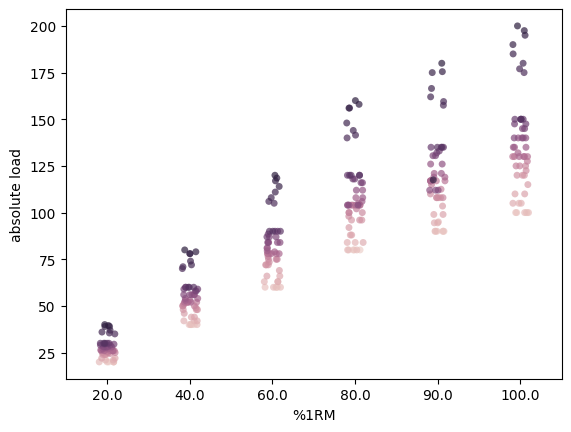

In [14]:
sns.stripplot(data=reshape_group_df(df_fw), x='%1RM', y='absolute load',
    alpha=0.7,
    hue='participant',legend=False
)

<AxesSubplot: xlabel='%1RM', ylabel='absolute load'>

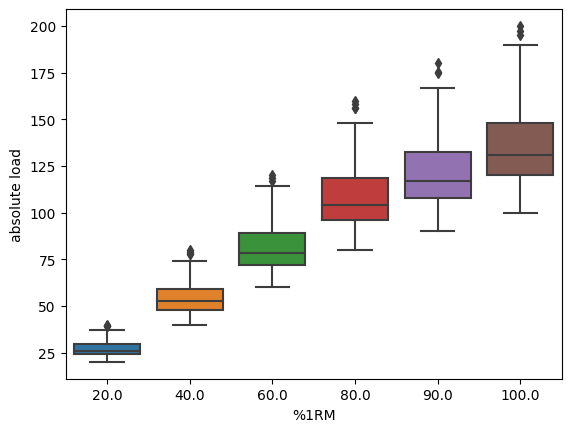

In [15]:
sns.boxplot(data=reshape_group_df(df_fw), x='%1RM', y='absolute load')

In [36]:
df_fw.columns

Index(['Age', 'Mass', 'Height', 'Load20%1RM', 'Load40%1RM', 'Load60%1RM',
       'Load80%1RM', 'Load90%1RM', 'Load-1RM-1', '20% MV', '40%MV', '60%MV',
       '80%MV', '90%MV', '100%MV'],
      dtype='object')

## Archive: Plot individual load-velocity profiles

In [85]:
# # Create function # 2022-11-26 16:10 No longer relevant
# def reshape_group_df(df):
#     """
#     Reshape dataframe each row represents data from one rep (each participant has multiple columns).
#     Used for data visualization.
#     """
#     # Sort participants by strength
#     df = df.sort_values('Load-1RM-1').reset_index(drop=True)
    
#     velocity_columns = df.columns[df.columns.str.contains('MV')]
#     load_columns = df.columns[df.columns.str.contains('Load')]
#     df = pd.concat([
#         df.melt(
#             value_vars=load_columns, value_name='absolute load',
#             ignore_index=False
#         ),
#         df.melt(
#             id_vars='Load-1RM-1',
#             value_vars=velocity_columns, var_name='%1RM', value_name='mean velocity',
#             ignore_index=False
#             )
#     ], axis=1).drop(columns='variable')
#     df['%1RM'] = df['%1RM'].str.replace('(\d*)\D*','\\1', regex=True).astype(float)
#     df = df.rename({'Load-1RM-1':'1RM'}, axis=1)

#     df = df.reset_index(names='participant')
#     return df

# # Test the function on first participant's data
# print(df_fw.head(1).filter(regex='Load|MV'))
# reshape_group_df(df_fw.head(1))

   Load20%1RM  Load40%1RM  Load60%1RM  Load80%1RM  Load90%1RM  Load-1RM-1  \
0        39.0          78       114.0       156.0       175.0       190.0   

   20% MV  40%MV  60%MV  80%MV  90%MV  100%MV  
0    1.05   0.91   0.76   0.52   0.39    0.26  


participant  absolute load    1RM   %1RM  mean velocity
0            0           39.0  190.0   20.0           1.05
1            0           78.0  190.0   40.0           0.91
2            0          114.0  190.0   60.0           0.76
3            0          156.0  190.0   80.0           0.52
4            0          175.0  190.0   90.0           0.39
5            0          190.0  190.0  100.0           0.26

In [63]:
reshaped_df = reshape_group_df(df_fw)
reshaped_df

participant  absolute load    1RM   %1RM  mean velocity
0              0           20.0  100.0   20.0           1.09
1              1           20.0  100.0   20.0           0.97
2              2           20.0  100.0   20.0           1.04
3              3           20.0  100.0   20.0           0.99
4              4           20.0  100.0   20.0           1.11
..           ...            ...    ...    ...            ...
307           47          185.0  185.0  100.0           0.27
308           48          190.0  190.0  100.0           0.26
309           49          195.0  195.0  100.0           0.27
310           50          197.5  197.5  100.0           0.27
311           51          200.0  200.0  100.0           0.27

[312 rows x 5 columns]

In [113]:
# 2022-11-25 10:41 Realized I should make load the y-variable
# import matplotlib.pyplot as plt
# def plot_profiles(df, y='mean velocity', x='absolute load', row='participant', 
#     show_legend=False, yaxis_label=None, xticks=None, title=None):

#     """
#     Make a figure containing subplots with lineplots. Subplots titles are labelled from a-z.

#     Parameters:
#     * df: Dataframe.
#     * y: Column name with y-axis data.
#     * x: Column name with x-axis data.
#     * column: Column name of categorical data for creating the different columns in the subplot. 
#         Default is Female/Male.
#     * row: Column name of categorical data for creating the different rows in the subplot.
#     * hue: Same as for seaborn parameter, i.e. categorical variable for creating different lines.
#     * yaxis_label: Label of y-axis. If none, will default to the name of the data column.
#     * xticks: Ticks of the x-axis. If none, will be set to default.
#     * title: Subplot title. If none, will be blank.
#     """
    
#     participants = sorted(df[row].unique())
#     subplot_label = [x+1 for x in range(-1,100)]
#     nrows = round((len(participants)+1)/4)

#     title_variable = df[row].name
#     fig, ax = plt.subplots(nrows=nrows ,ncols=4, figsize=(10,nrows*3))
#     fig.suptitle(title, fontsize=20)
#     ymin = df[y].min()
#     ymax = df[y].max()
#     ax = ax.flatten()
#     # colors = sns.color_palette("rocket", as_cmap = True)

#     ax_index = 0
#     for index, participant in enumerate(participants):
#         # print(participant)
#         if (show_legend==True):
#             legend = 'full'
#         else:
#             legend = False
#         filter = (df[row] == participant)

#         sns.lineplot(data=df[filter], y=y, 
#             x=x, marker='o', alpha=0.9,
#             legend=legend,
#                 ax = ax[ax_index])
#         if nrows > 1:
#             ax[ax_index].set_title(f'{subplot_label[ax_index]}) {title_variable} {participant}', loc='left')
#         else:
#             ax[ax_index].set_title(f'{subplot_label[ax_index]})', fontsize=12, loc='left')
#         ax[ax_index].set_ylim([ymin,ymax]) # Make the y axes all the same
#         if yaxis_label:
#             ax[ax_index].set_ylabel(yaxis_label)
#         if xticks:
#             ax[ax_index].xaxis.set_ticks(xticks)
#         if (legend == 'full'):
#             # Reverse order of legend entries, then position the legend
#             handles, labels = ax[ax_index].get_legend_handles_labels()
#             ax[ax_index].legend(handles[::-1], labels[::-1])
#             sns.move_legend(ax[ax_index],'center left',bbox_to_anchor=(1, 0.5))

#         ax_index += 1
        
#     plt.tight_layout(rect=[0, 0, 1, 0.98])
#     return fig

In [322]:
# 2022-11-25 10:41 Realized I should make load the y-variable
import matplotlib.pyplot as plt
def plot_profiles(df, y='absolute load', x='mean velocity', row='participant', 
    show_legend=False, yaxis_label=None, xticks=None, title=None):

    """
    Make a figure containing subplots with lineplots. Subplots titles are labelled from a-z.

    Parameters:
    * df: Dataframe.
    * y: Column name with y-axis data.
    * x: Column name with x-axis data.
    * column: Column name of categorical data for creating the different columns in the subplot. 
        Default is Female/Male.
    * row: Column name of categorical data for creating the different rows in the subplot.
    * hue: Same as for seaborn parameter, i.e. categorical variable for creating different lines.
    * yaxis_label: Label of y-axis. If none, will default to the name of the data column.
    * xticks: Ticks of the x-axis. If none, will be set to default.
    * title: Subplot title. If none, will be blank.
    """
    
    participants = sorted(df[row].unique())
    subplot_label = [x+1 for x in range(-1,100)]
    nrows = round((len(participants)+1)/4)

    title_variable = df[row].name
    fig, ax = plt.subplots(nrows=nrows ,ncols=4, figsize=(10,nrows*3))
    fig.suptitle(title, fontsize=20)
    ymin = df[y].min()
    ymax = df[y].max()
    ax = ax.flatten()
    # colors = sns.color_palette("rocket", as_cmap = True)

    ax_index = 0
    for index, participant in enumerate(participants):
        # print(participant)
        if (show_legend==True):
            legend = 'full'
        else:
            legend = False
        filter = (df[row] == participant)

        sns.lineplot(data=df[filter], y=y, 
            x=x, marker='o', alpha=0.9,
            legend=legend,
                ax = ax[ax_index])
        if nrows > 1:
            ax[ax_index].set_title(f'{subplot_label[ax_index]}) {title_variable} {participant}', loc='left')
        else:
            ax[ax_index].set_title(f'{subplot_label[ax_index]})', fontsize=12, loc='left')
        ax[ax_index].set_ylim([ymin,ymax]) # Make the y axes all the same
        if yaxis_label:
            ax[ax_index].set_ylabel(yaxis_label)
        if xticks:
            ax[ax_index].xaxis.set_ticks(xticks)
        if (legend == 'full'):
            # Reverse order of legend entries, then position the legend
            handles, labels = ax[ax_index].get_legend_handles_labels()
            ax[ax_index].legend(handles[::-1], labels[::-1])
            sns.move_legend(ax[ax_index],'center left',bbox_to_anchor=(1, 0.5))

        ax_index += 1
        
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    return fig

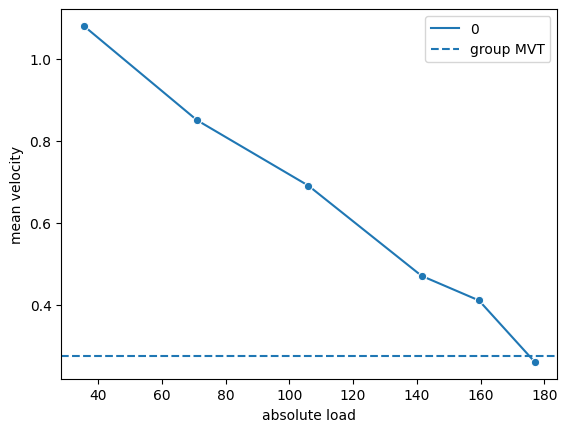

In [73]:
# Plot of mean velocity vs. absolute load
# This represents models 1 and 2
ax = sns.lineplot(data=reshape_group_df(pd.DataFrame(df_fw.loc[51]).transpose()), x='absolute load', y='mean velocity',
hue='participant', marker='o')
ax.axhline(y=df_fw['100%MV'].mean(),
    label='group MVT',ls='--')
ax.legend()

### Free weight

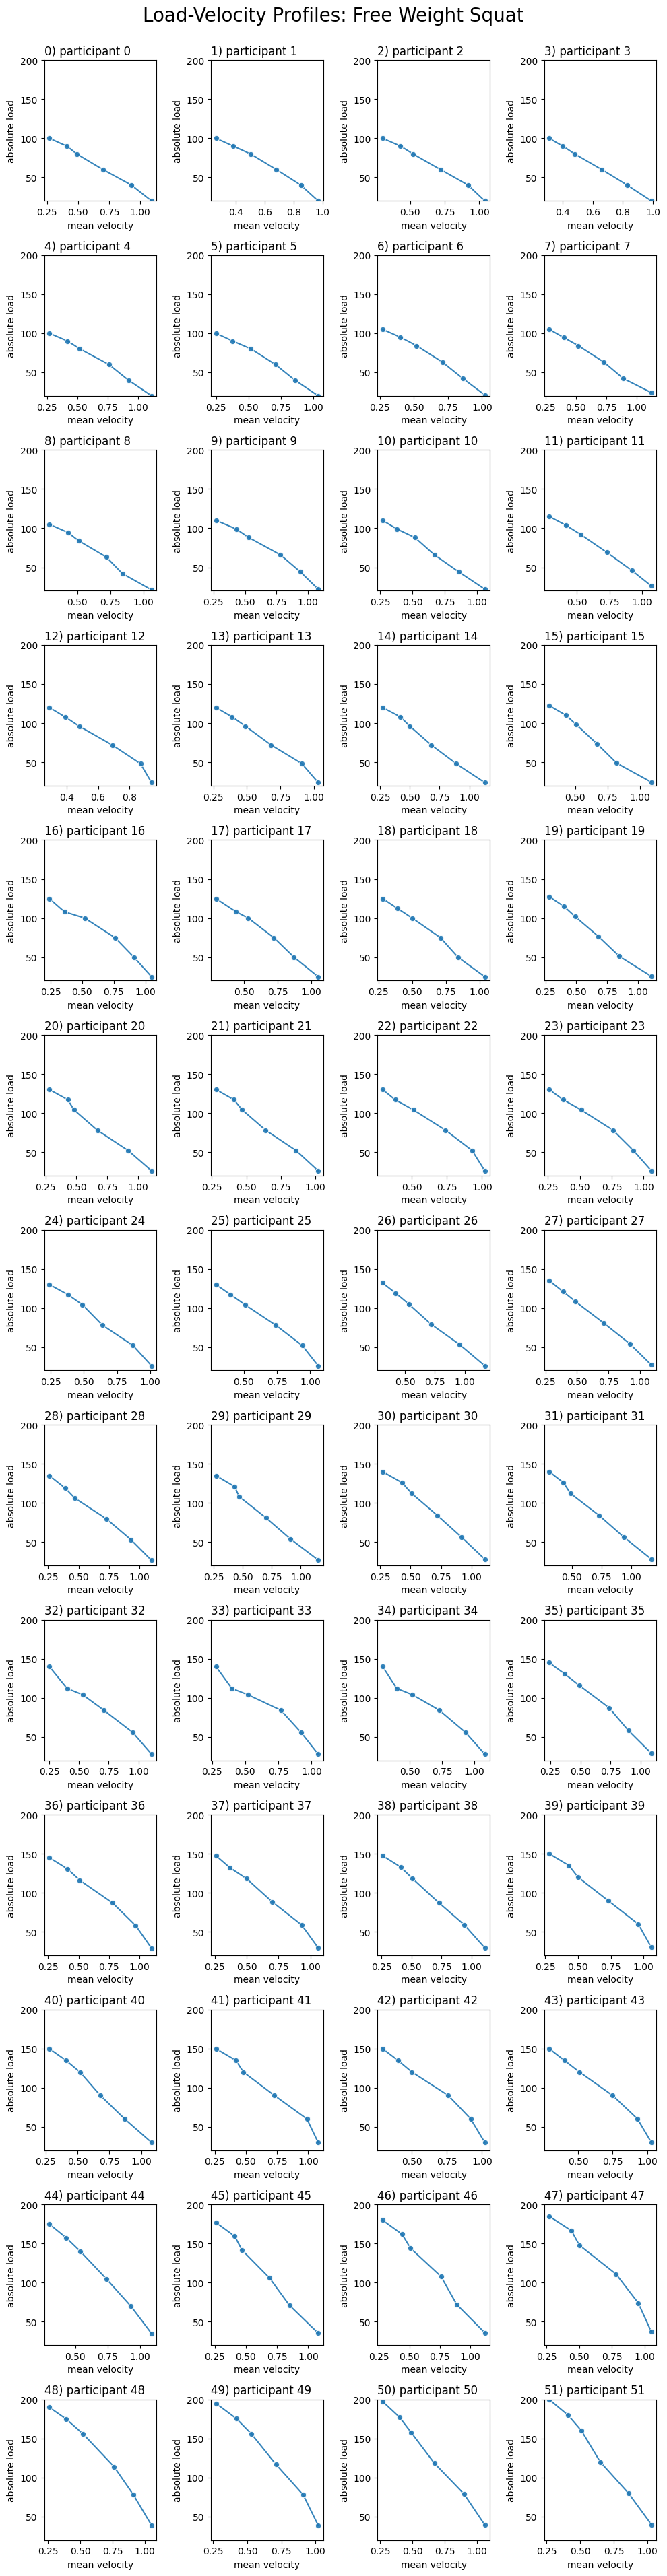

In [587]:
# lv_profiles_fw = plot_profiles(reshape_group_df(df_fw), title='Load-Velocity Profiles: Free Weight Squat')
# lv_profiles_fw.savefig('../output/figures/individual_lv_profiles_fw.png')

### Smith Machine

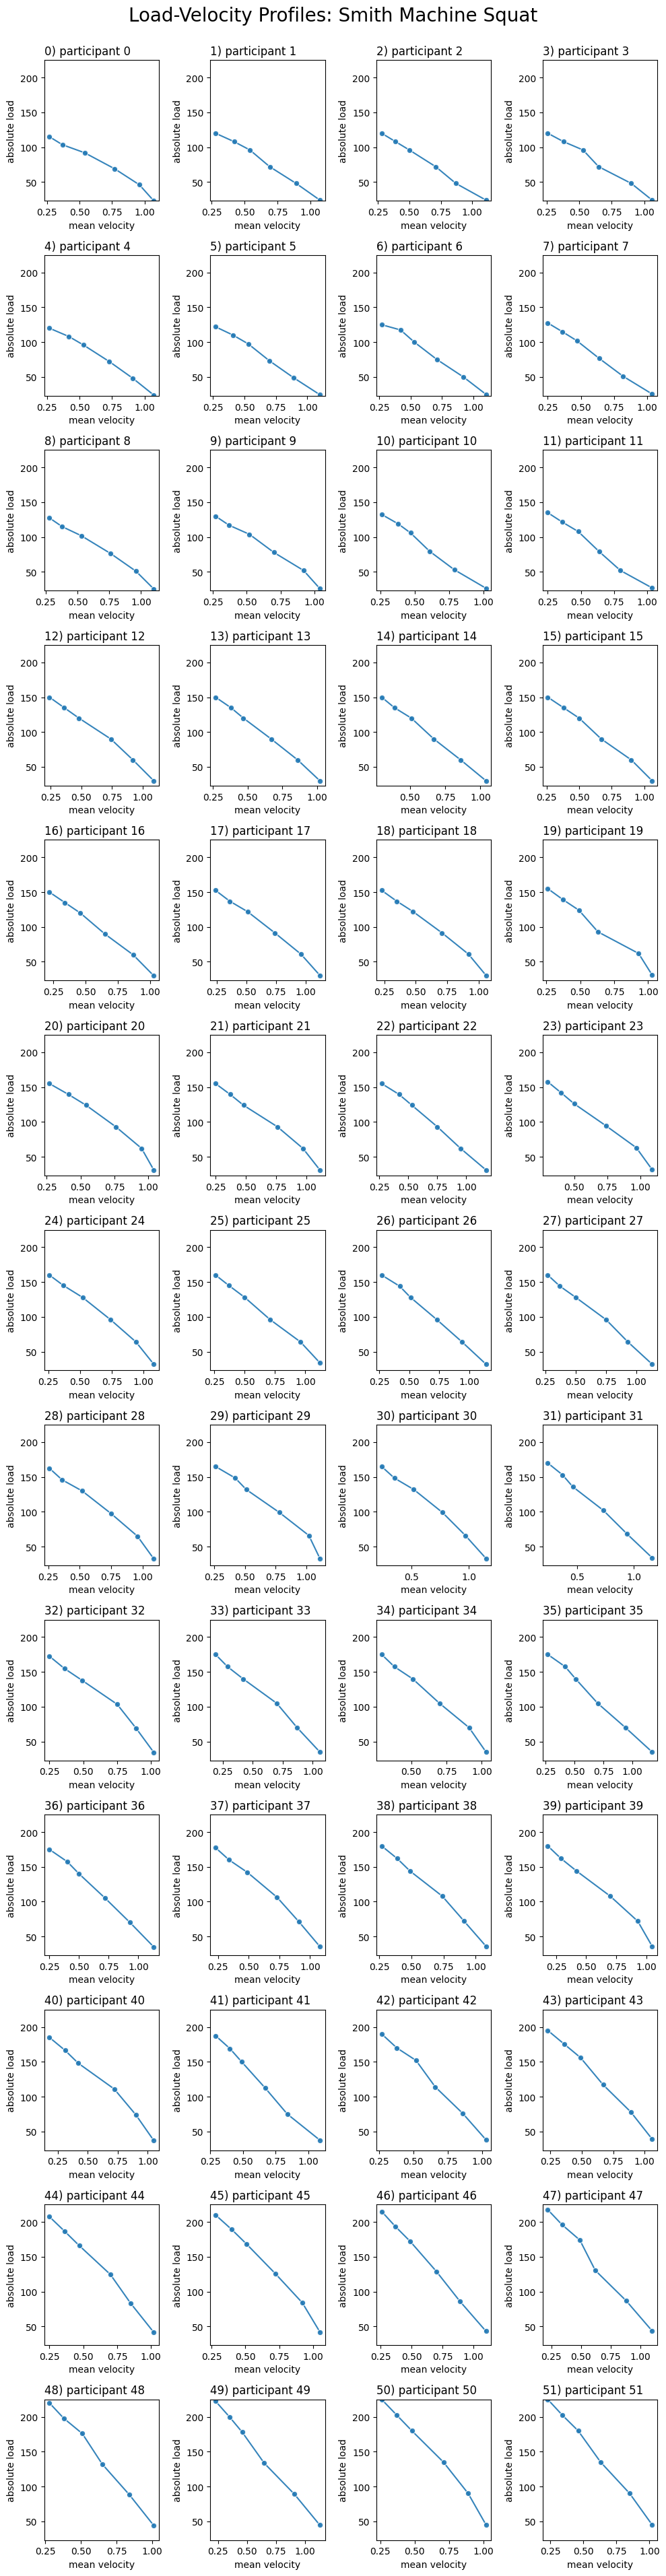

In [326]:
# lv_profiles_sm = plot_profiles(reshape_group_df(df_sm), 
#     title='Load-Velocity Profiles: Smith Machine Squat')
# lv_profiles_sm.savefig('../output/figures/individual_lv_profiles_smith.png')

## Data entry error

In [86]:
reshaped_df[reshaped_df['participant'] == 50]

participant  absolute load    1RM   %1RM  mean velocity
50            50           39.5  197.5   20.0           1.06
102           50           79.0  197.5   40.0           0.90
154           50          118.5  197.5   60.0           0.67
206           50          158.0  197.5   80.0           0.49
258           50          117.5  197.5   90.0           0.40
310           50          197.5  197.5  100.0           0.27

In [89]:
# look for the typo in participant 50's data

for i in [20, 40, 60, 80, 90, 100]:
    print(i/100 * 197.5)

39.5
79.0
118.5
158.0
177.75
197.5


# Feature engineering and data visualization

## `linear_regression` and `individual_regression` functions

In [640]:
# 2022-11-25 10:38 realize I need to reverse the load and velocity for the calculations
# 2022-11-21 0:53 Allow to be used as a stand-alone function or when called with .apply with transposed df.
def linear_regression(df):
    """
    Required by other functions.
    Calculate slope and intercept using linear regression, where X = load, y = velocity.
    """
    from sklearn.linear_model import LinearRegression

    if type(df)==pd.Series:
        velocity_columns = df.index[df.index.str.contains('MV')]
        load_columns = df.index[df.index.str.contains('Load')]

        load = df[load_columns].values.reshape(-1,1)
        velocity = df[velocity_columns].values.reshape(-1,1)

        lr = LinearRegression()
        lr.fit(velocity, load)
        
        # LinearRegression attributes are in arrays, so need to access values with indices
        df['slope'] = lr.coef_[0][0] 
        df['intercept'] = lr.intercept_[0]

        return df
    else:
        velocity_columns = df.columns[df.columns.str.contains('MV')]
        load_columns = df.columns[df.columns.str.contains('Load')]
        load = df[load_columns].values.reshape(-1,1)
        velocity = df[velocity_columns].values.reshape(-1,1)

        lr = LinearRegression()
        lr.fit(velocity, load)

        df_lr = pd.DataFrame()
        df_lr['slope'] = lr.coef_[0]
        df_lr['intercept'] = lr.intercept_

        return df_lr

linear_regression(df_fw.head(1))

slope   intercept
0 -189.397068  248.125765

In [286]:
def individual_regression(df):
    """
    Necessary for feature engineering.
    Calculate slope and intercept for each row of the dataframe (i.e. for each individual participant)
    by calling the linear_regression function.
    """
    df_lr = df.transpose().apply(lambda x:linear_regression(x)).transpose()
    # df_lr = df.apply(lambda x: print(x['Age']))
    # print(type(df_lr))
    
    df_lr['group MVT'] =  df_lr['100%MV'].mean()
    print('Dataframe shape: ', df_lr.transpose().shape)
    return df_lr

individual_regression(df_fw.head(3))

Dataframe shape:  (18, 3)


Age  Mass  Height  Load20%1RM  Load40%1RM  Load60%1RM  Load80%1RM  \
0  22.0  77.8   175.0        39.0        78.0       114.0       156.0   
1  21.0  71.6   179.0        24.0        48.0        72.0        96.0   
2  19.0  60.8   165.0        26.0        52.0        78.0       104.0   

   Load90%1RM  Load-1RM-1  20% MV  40%MV  60%MV  80%MV  90%MV  100%MV  \
0       175.0       190.0    1.05   0.91   0.76   0.52   0.39    0.26   
1       108.0       120.0    1.03   0.91   0.68   0.49   0.39    0.27   
2       117.0       130.0    1.06   0.92   0.76   0.51   0.37    0.26   

      slope  intercept  group MVT  
0 -0.005181   1.297675   0.263333  
1 -0.008061   1.257123   0.263333  
2 -0.007854   1.310351   0.263333

In [ ]:
plot_profiles(reshaped_df[reshaped_df['participant'] >46 ]);

## Engineer features

In [343]:
# individual MVT
df_sm2 = individual_regression(df_sm)
df_sm2.head()



Dataframe shape:  (18, 52)


Age  Mass  Height  Load20%1RM  Load40%1RM  Load60%1RM  Load80%1RM  \
0  22.0  77.8   175.0        42.0        84.0       126.0       168.0   
1  21.0  71.6   179.0        30.0        60.0        90.0       120.0   
2  19.0  60.8   165.0        30.0        60.0        90.0       120.0   
3  21.0  58.4   172.0        24.0        48.0        72.0        96.0   
4  20.0  82.3   185.0        35.0        70.0       105.0       140.0   

   Load90%1RM  Load-1RM-1  20% MV  40%MV  60%MV  80%MV  90%MV  100%MV  \
0       189.0       210.0    1.05   0.92   0.72   0.51   0.40    0.28   
1       135.0       150.0    1.06   0.90   0.67   0.50   0.38    0.26   
2       135.0       150.0    1.09   0.92   0.74   0.48   0.36    0.24   
3       108.0       120.0    1.07   0.91   0.73   0.53   0.42    0.27   
4       157.5       175.0    1.03   0.91   0.70   0.51   0.38    0.29   

        slope   intercept  group MVT  
0 -213.341118  274.460590   0.255577  
1 -149.626853  191.515539   0.255577  
2 -138.272309  185.763824   0.255577  
3 -121.181946  157.374175   0.255577  
4 -182.018215  229.634930   0.255577

In [596]:
# individual MVT
df_fw2 = individual_regression(df_fw)
df_fw2.head()



Dataframe shape:  (18, 52)


Age  Mass  Height  Load20%1RM  Load40%1RM  Load60%1RM  Load80%1RM  \
0  22.0  77.8   175.0        39.0        78.0       114.0       156.0   
1  21.0  71.6   179.0        24.0        48.0        72.0        96.0   
2  19.0  60.8   165.0        26.0        52.0        78.0       104.0   
3  21.0  58.4   172.0        20.0        40.0        60.0        80.0   
4  20.0  82.3   185.0        30.0        60.0        90.0       120.0   

   Load90%1RM  Load-1RM-1  20% MV  40%MV  60%MV  80%MV  90%MV  100%MV  \
0       175.0       190.0    1.05   0.91   0.76   0.52   0.39    0.26   
1       108.0       120.0    1.03   0.91   0.68   0.49   0.39    0.27   
2       117.0       130.0    1.06   0.92   0.76   0.51   0.37    0.26   
3        90.0       100.0    0.97   0.85   0.68   0.50   0.38    0.26   
4       135.0       150.0    1.02   0.92   0.76   0.50   0.40    0.29   

        slope   intercept  group MVT  
0 -189.397068  248.125765   0.275192  
1 -123.167417  155.390194   0.275192  
2 -125.314695  165.536836   0.275192  
3 -111.189180  132.454769   0.275192  
4 -154.816908  197.872962   0.275192

## Reshape dataframe, use individual regression to predict

In [335]:
# 2022-11-25 10:51 Realized I need to make load y-variable # Create function
import re
def reshape_group_df_lr(df):
    """
    Necessary for (1) statistical linear regression and (2) data visualization.
    Reshape dataframe each row represents data from one rep (each participant has multiple columns).
    Add the estimations from the linear regression.
    """
    # Calculate slope and intercept for each row of the dataframe (i.e. for each individual participant)
    # by calling the linear_regression function.
    print('Original shape: ',df.shape)
    df = df.transpose().apply(lambda x:linear_regression(x)).transpose()
    
    velocity_columns = df.columns[df.columns.str.contains('MV')]
    load_columns = df.columns[df.columns.str.contains('Load')]

    # Use intercept and slope to calculate predicted load
    for column in velocity_columns:
        df[re.sub('(\d*%).*','\\1 predicted load', column)] = df['slope'] * df[column] + df['intercept']
    
    prediction_columns = df.columns[df.columns.str.contains('predicted load')].to_list()

    # Sort participants by strength
    df = df.sort_values('Load-1RM-1').reset_index(drop=True)
    df2 = pd.concat([
        df.melt(
            value_vars=load_columns, value_name='absolute load',
            ignore_index=False
        ),
        df.melt(
            id_vars='Load-1RM-1',
            value_vars=velocity_columns, var_name='%1RM', value_name='mean velocity',
            ignore_index=False
            ),
    ], axis=1).drop(columns='variable')

    df3 = df.melt(
            # id_vars='Load-1RM-1',
            value_vars=prediction_columns, value_name='predicted load', 
            ignore_index=False
            ).reset_index(drop=True).drop(columns='variable')
    df2['%1RM'] = df2['%1RM'].str.replace('(\d*)\D*','\\1', regex=True).astype(float)
    df2 = df2.rename({'Load-1RM-1':'1RM'}, axis=1)

    df2 = df2.reset_index(names='participant')
    df2 = pd.concat([df2,df3],axis=1)
    print('New shape: ', df2.shape)

    return df2


# Test the function on first participant's data
print(df_fw.head(1).filter(regex='Load|MV'))
reshape_group_df_lr(df_fw.head(3))

   Load20%1RM  Load40%1RM  Load60%1RM  Load80%1RM  Load90%1RM  Load-1RM-1  \
0        39.0          78       114.0       156.0       175.0       190.0   

   20% MV  40%MV  60%MV  80%MV  90%MV  100%MV  
0    1.05   0.91   0.76   0.52   0.39    0.26  
Original shape:  (3, 15)
New shape:  (18, 6)


participant  absolute load    1RM   %1RM  mean velocity  predicted load
0             0           24.0  120.0   20.0           1.03       28.527754
1             1           26.0  130.0   20.0           1.06       32.703260
2             2           39.0  190.0   20.0           1.05       49.258845
3             0           48.0  120.0   40.0           0.91       43.307844
4             1           52.0  130.0   40.0           0.92       50.247317
5             2           78.0  190.0   40.0           0.91       75.774434
6             0           72.0  120.0   60.0           0.68       71.636350
7             1           78.0  130.0   60.0           0.76       70.297668
8             2          114.0  190.0   60.0           0.76      104.183994
9             0           96.0  120.0   80.0           0.49       95.038159
10            1          104.0  130.0   80.0           0.51      101.626342
11            2          156.0  190.0   80.0           0.52      149.639290
12            0          108.0  120.0   90.0           0.39      107.354901
13            1          117.0  130.0   90.0           0.37      119.170399
14            2          175.0  190.0   90.0           0.39      174.260909
15            0          120.0  120.0  100.0           0.27      122.134991
16            1          130.0  130.0  100.0           0.26      132.955015
17            2          190.0  190.0  100.0           0.26      198.882528

# Data visualization

In [236]:
# # 2022-11-25 10:41 Realized I should make load the y-variable
# import matplotlib.pyplot as plt
# def plot_profiles_lr(df, y='mean velocity', x='absolute load', row='participant', 
#     y_pred='predicted mean velocity', show_legend=False, yaxis_label=None, xticks=None, title=None):

#     """
#     Make a figure containing subplots with lineplots. Subplots titles are labelled from a-z.

#     Parameters:
#     * df: Dataframe.
#     * y: Column name with y-axis data.
#     * x: Column name with x-axis data.
#     * column: Column name of categorical data for creating the different columns in the subplot. 
#         Default is Female/Male.
#     * row: Column name of categorical data for creating the different rows in the subplot.
#     * yaxis_label: Label of y-axis. If none, will default to the name of the data column.
#     * xticks: Ticks of the x-axis. If none, will be set to default.
#     * title: Subplot title. If none, will be blank.
#     """
    
#     participants = sorted(df[row].unique())
#     subplot_label = [x+1 for x in range(-1,100)]
#     nrows = round((len(participants)+1)/4)

#     title_variable = df[row].name
#     fig, ax = plt.subplots(nrows=nrows ,ncols=4, figsize=(10,nrows*2.5))
#     fig.suptitle(title, fontsize=20)
#     ymin = df[y].min()
#     ymax = df[y].max()
#     ax = ax.flatten()
#     # colors = sns.color_palette("rocket", as_cmap = True)

#     ax_index = 0
#     for index, participant in enumerate(participants):

#         if (show_legend==True) & (ax_index==0):
#             legend = 'full'
#         else:
#             legend = False
#         filter = (df[row] == participant)

#         # Plot measured values
#         sns.lineplot(data=df[filter], y=y, 
#             x=x, marker='o', alpha=0.9,
#             legend=legend, label='measured',
#                 ax = ax[ax_index])
#         # Plot predicted values
#         sns.lineplot(data=df[filter], y=y_pred, 
#             x=x, alpha=0.9, label='regression', ls=':',
#             legend=legend,
#                 ax = ax[ax_index])
#         if nrows > 1:
#             ax[ax_index].set_title(f'{subplot_label[ax_index]}) {title_variable} {participant}', loc='left')
#         else:
#             ax[ax_index].set_title(f'{subplot_label[ax_index]})', loc='left')
#         ax[ax_index].set_ylim([ymin,ymax]) # Make the y axes all the same
#         if yaxis_label:
#             ax[ax_index].set_ylabel(yaxis_label)
#         if xticks:
#             ax[ax_index].xaxis.set_ticks(xticks)
#         if (legend == 'full'):
#             ax[ax_index].legend()

#         ax_index += 1
        
#     plt.tight_layout(rect=[0, 0, 1, 0.98])
#     return fig

In [340]:
# 2022-11-25 10:41 Realized I should make load the y-variable
import matplotlib.pyplot as plt
def plot_profiles_lr(df, y='absolute load', x='mean velocity', row='participant', 
    y_pred='predicted load', show_legend=False, yaxis_label=None, xticks=None, title=None, scale=False):

    """
    Make a figure containing subplots with lineplots for each individual participant.

    Parameters:
    * df: Dataframe.
    * y: Column name with y-axis data.
    * x: Column name with x-axis data.
    * column: Column name of categorical data for creating the different columns in the subplot. 
        Default is Female/Male.
    * row: Column name of categorical data for creating the different rows in the subplot.
    * yaxis_label: Label of y-axis. If none, will default to the name of the data column.
    * xticks: Ticks of the x-axis. If none, will be set to default.
    * title: Subplot title. If none, will be blank.
    """
    
    participants = sorted(df[row].unique())
    subplot_label = [x+1 for x in range(-1,100)]
    nrows = round((len(participants)+1)/4)

    title_variable = df[row].name
    fig, ax = plt.subplots(nrows=nrows ,ncols=4, figsize=(10,nrows*2.5))
    fig.suptitle(title, fontsize=20)
    ymin = df[y].min()
    ymax = df[y].max()
    ax = ax.flatten()
    # colors = sns.color_palette("rocket", as_cmap = True)

    ax_index = 0
    for index, participant in enumerate(participants):

        if (show_legend==True) & (ax_index==0):
            legend = 'full'
        else:
            legend = False
        filter = (df[row] == participant)

        # Plot measured values
        sns.lineplot(data=df[filter], y=y, 
            x=x, marker='o', alpha=0.9,
            legend=legend, label='measured',
                ax = ax[ax_index])
        # Plot predicted values
        sns.lineplot(data=df[filter], y=y_pred, 
            x=x, alpha=0.9, label='regression', ls=':',
            legend=legend,
                ax = ax[ax_index])
        if nrows > 1:
            ax[ax_index].set_title(f'{subplot_label[ax_index]}) {title_variable} {participant}', loc='left')
        else:
            ax[ax_index].set_title(f'{subplot_label[ax_index]})', loc='left')
        if scale==True:
            ax[ax_index].set_ylim([ymin,ymax]) # Make the y axes all the same
        if yaxis_label:
            ax[ax_index].set_ylabel(yaxis_label)
        if xticks:
            ax[ax_index].xaxis.set_ticks(xticks)
        if (legend == 'full'):
            ax[ax_index].legend()

        ax_index += 1
        
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    return fig

## Plot individuals' predicted and measured load velocity profiles 

Original shape:  (52, 15)
New shape:  (312, 6)


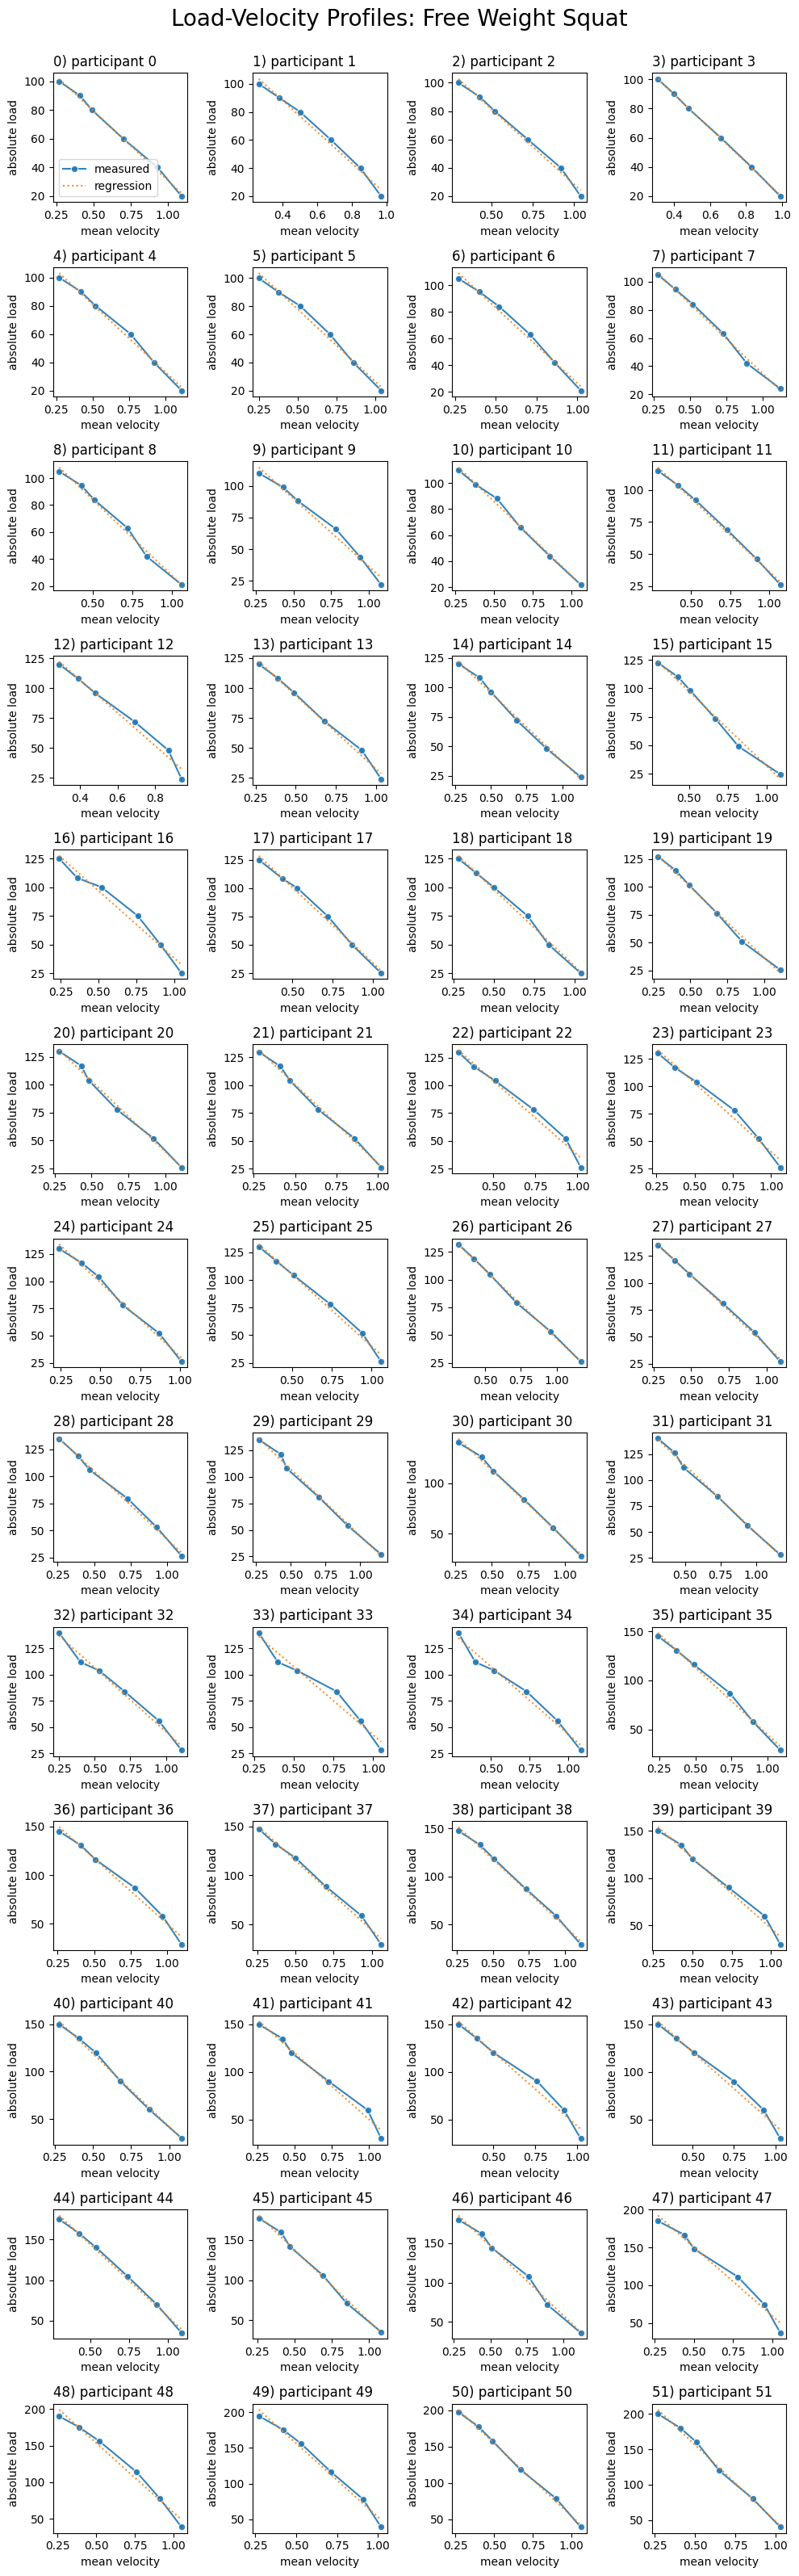

In [641]:
lv_profiles_predictions_fw = plot_profiles_lr(reshape_group_df_lr(df_fw), title='Load-Velocity Profiles: Free Weight Squat',
show_legend=True);

lv_profiles_predictions_fw.savefig('../output/figures/individual_lv_profiles_fw.png')

Original shape:  (52, 15)
New shape:  (312, 6)


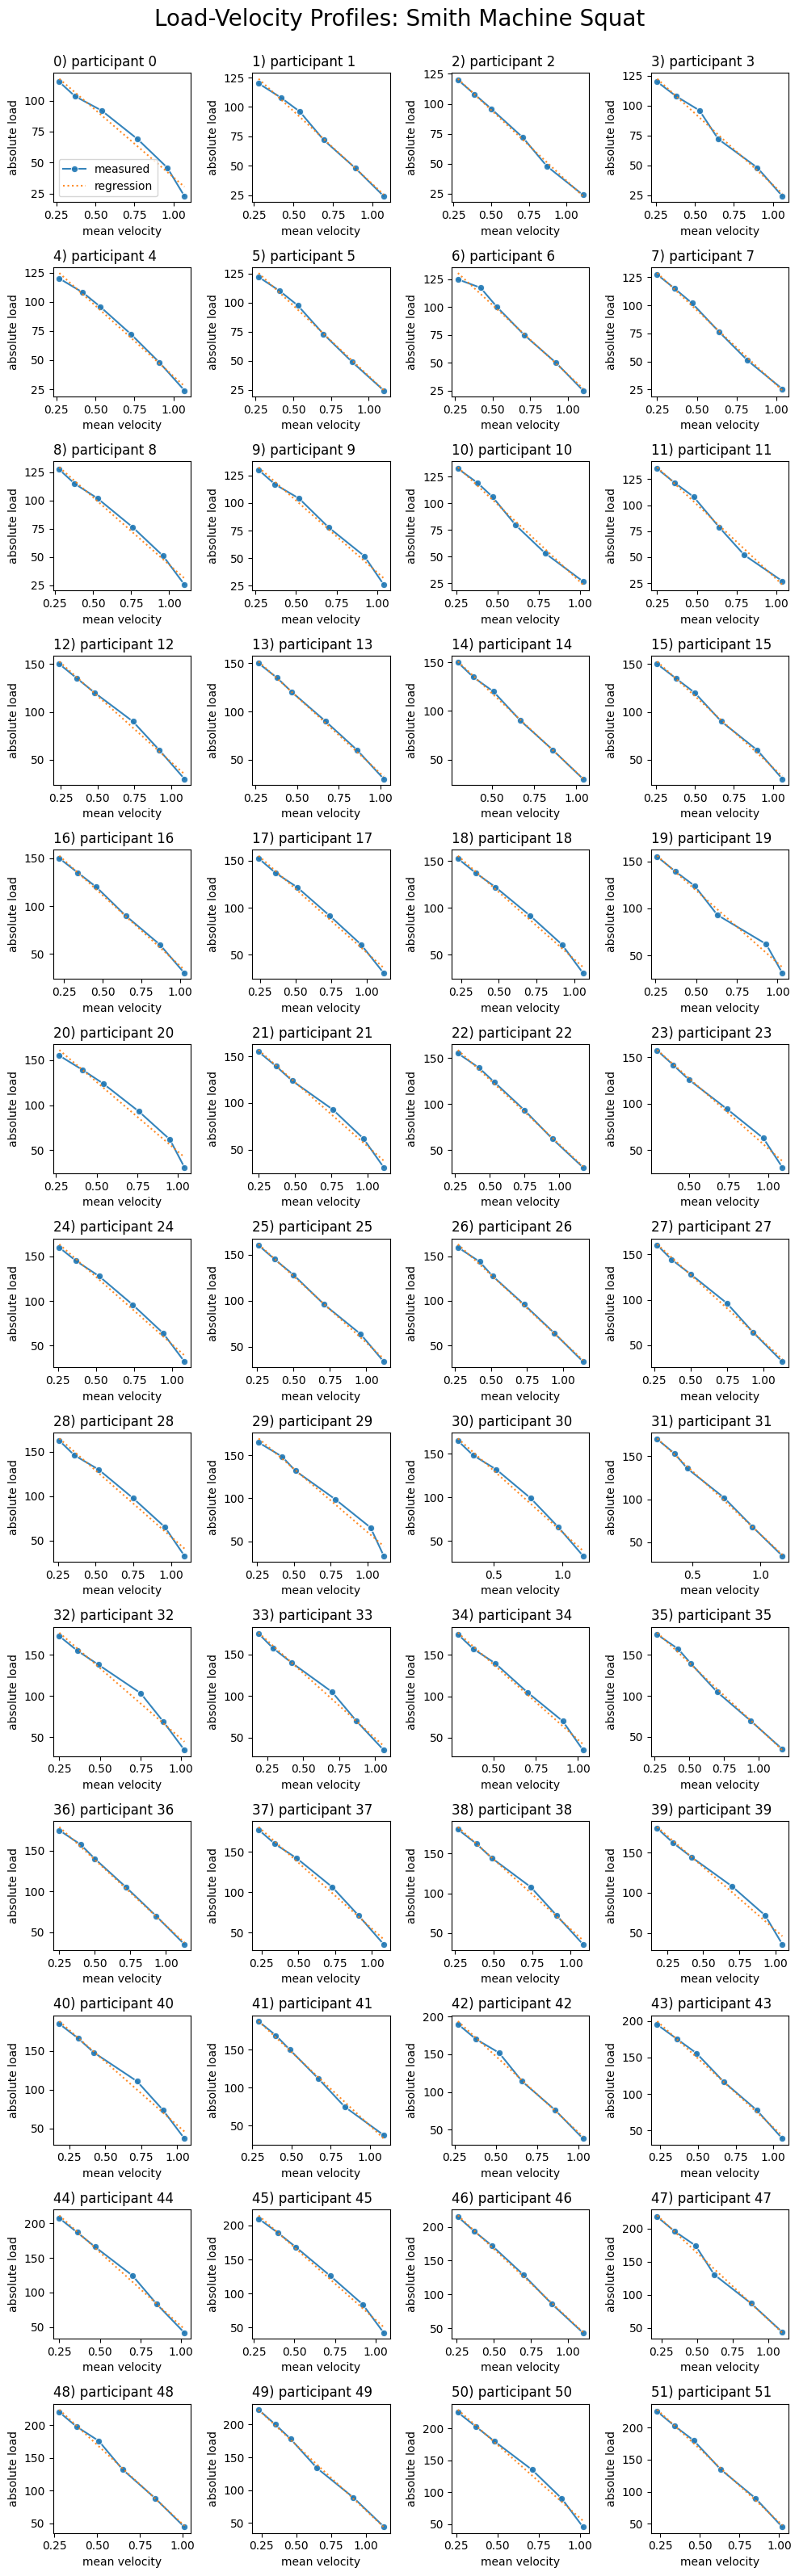

In [342]:
lv_profiles_predictions_sm = plot_profiles_lr(reshape_group_df_lr(df_sm), title='Load-Velocity Profiles: Smith Machine Squat',
show_legend=True, scale=False);

lv_profiles_predictions_sm.savefig('../output/figures/individual_lv_profiles_smith.png')

## Plot variable distributions and correlations

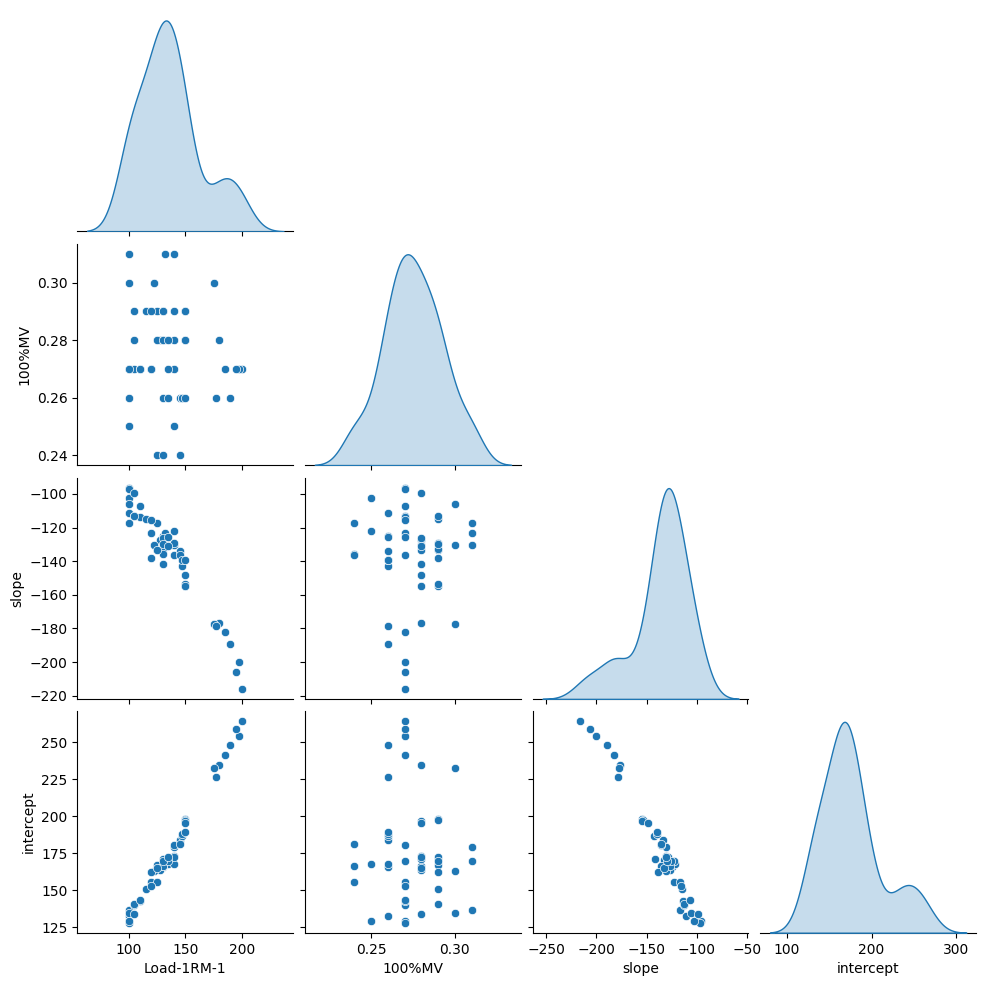

In [642]:
pairplot_fw = sns.pairplot(df_fw2[['Load-1RM-1','100%MV', 'slope', 'intercept']], diag_kind='kde', corner=True)
pairplot_fw.savefig('../output/figures/pairplot_fw.png')

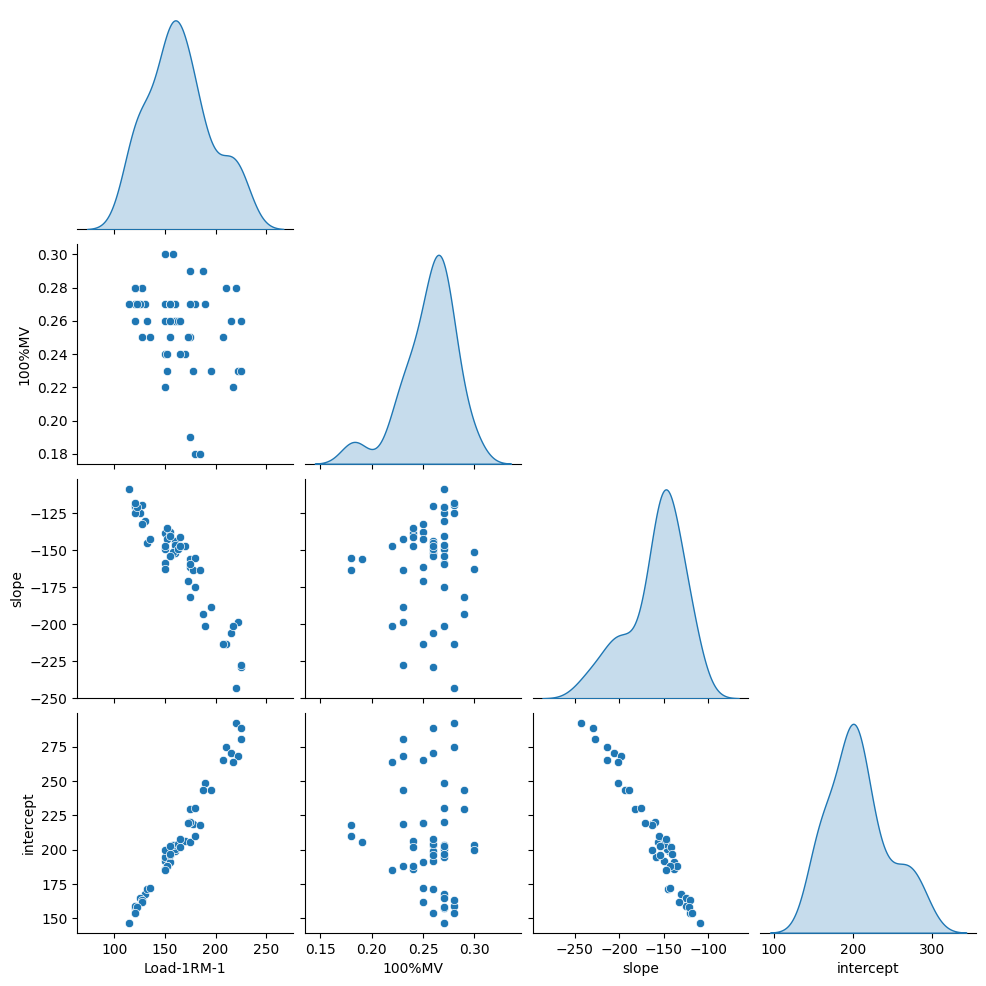

In [512]:
pairplot_sm = sns.pairplot(df_sm2[['Load-1RM-1','100%MV', 'slope', 'intercept']], diag_kind='kde', corner=True)
pairplot_sm.savefig('../output/figures/pairplot_sm.png')

## Plot group data for both exercises

Original shape:  (52, 15)
New shape:  (312, 6)
Original shape:  (52, 15)
New shape:  (312, 6)
Original shape:  (52, 15)
New shape:  (312, 6)
Original shape:  (52, 15)
New shape:  (312, 6)


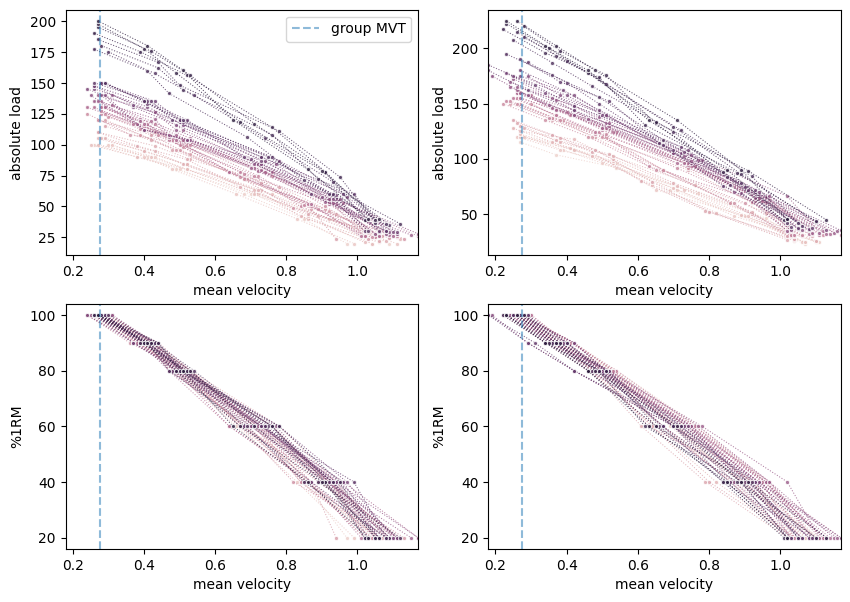

In [639]:
def data_viz(df_fw, df_sm):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
    xmin = pd.concat([df_fw['100%MV'],df_sm['100%MV']], axis=0).min()
    xmax = pd.concat([df_fw['20% MV'],df_sm['20% MV']], axis=0).max()
    # print(xmin, xmax)
    
    for index, df in enumerate([df_fw, df_sm]):
        # absolute load
        sns.lineplot(data=reshape_group_df_lr(df), x='mean velocity', y='absolute load', 
            hue='participant', alpha=.8,marker='.', size=1, ls=':',
            legend=False, ax=ax[0, index]
        )
        ax[0, index].axvline(x=df_fw['100%MV'].mean(),
            label='group MVT',ls='--',alpha=.5)
        ax[0, index].set_xlim([xmin,xmax])

        # relative load
        sns.lineplot(data=reshape_group_df_lr(df), x='mean velocity', y='%1RM', 
            hue='participant', alpha=.8, marker='.', size=1, ls=':',
            legend=False, ax=ax[1, index]
        )
        ax[1, index].axvline(x=df_fw['100%MV'].mean(),
            label='group MVT',ls='--',alpha=.5)
        ax[1, index].set_xlim([xmin,xmax])

    ax[0,0].legend()
    return fig

data_viz_fig = data_viz(df_fw, df_sm)
data_viz_fig.savefig('../output/figures/data_viz.png')

# Modeling Functions

## `evaluate_regression` and `model_data` functions

In [651]:
# Function for model evaluation with train_test_split
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def evaluate_regression(y_test, y_pred, y_train, y_pred_train, model_name='regressor',plot=True):
    """
    * Print model evalutation metrics: 
        * RMSE
        * Mean absolute error (MAE)
        * R^2 score
        * Pearson correlation coefficient
    * If plot=True : Provide scatterplot of true vs. predicted values.
    Params:
    - plot (bool): If true, plot true vs. predicted values using test data set from train-test split.

    Returns: 
    - Evaluation metrics for train and test data subsets:
        - `.r2_train` and `.r2`
        - `.rmse_train` and `.rmse`
        - `.mean_abs_error_train` and `.mean_abs_error`
    """
    # Metrics for test data
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mean_abs_error = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mean_error = (y_pred-y_test).mean()

    # Metrics for training data

    rmse_train = mean_squared_error(y_train, y_pred_train)
    mean_abs_error_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    mean_error_train = (y_pred_train-y_train).mean()
    
    # Calculate Pearson Correlation between predicted and true values:
    pearson = stats.pearsonr(y_test, y_pred)
    pearson_train = stats.pearsonr(y_train, y_pred_train)

    print(f'\n{model_name} evaluation metrics: \n\t\tTest data\tTraining data\t\tDifference')
    print(f'RMSE: \t\t\t{rmse:.2f}\t\t{rmse_train:.2f}\t\t{(rmse - rmse_train):.2f}')
    print(f'MAE: \t\t\t{mean_abs_error:.2f}\t\t{mean_abs_error_train:.2f}\t\t{(mean_abs_error - mean_abs_error_train):.2f}')
    print(f'mean error: \t\t{mean_error:.2f}\t\t{mean_error_train:.2f}\t\t{(mean_error-mean_error_train):.2f}')
    print(f'R^2: \t\t\t{r2:.2f}\t\t{r2_train:.2f}\t\t{(r2 - r2_train):.2f}')
    print(f'Pearson r statistic: \t{pearson.statistic:.2f}\t\t{pearson_train.statistic:.2f}\t\t{pearson.statistic-pearson_train.statistic:.2f}')
    print(f'\t\t\tp={pearson.pvalue:.2f}\t\tp={pearson_train.pvalue:.2f}')
    print(f'\npredictions mean: \t{y_pred.mean():.2f}\t\t{y_pred_train.mean():.2f}\t\t{(y_pred.mean() - y_pred_train.mean()):.2f}')
    print(f'predictions std: \t{y_pred.std():.2f}\t\t{y_pred_train.std():.2f}\t\t{(y_pred.std() - y_pred_train.std()):.2f}')
    print(f'\ntarget mean: \t\t{y_test.mean():.2f}\t\t{y_train.mean():.2f}\t\t{y_test.mean()-y_train.mean():.2f}')
    print(f'target std: \t\t{y_test.std():.2f}\t\t{y_train.std():.2f}\t\t{y_test.std()-y_train.std():.2f}')

    if plot:
        ax = sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], ls=':', alpha=0.5)
        fig = sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, ax=ax)
        fig.set_xlabel('Measured')
        fig.set_ylabel('Predicted')
        fig.set_title(model_name)
        return fig

In [496]:
# Function to run model and evaluate it # Made for use with train_test_split 
# 2022-11-26 6:24 Update so output is a dictionary or named tuple
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def model_data(df_train, df_test, x_columns, model, model_name='regressor'):
    """
    Model, fit, and evaluate using a train-test split.
    """
    X_train = df_train[x_columns]
    X_test = df_test[x_columns]
    y_train = df_train['Load-1RM-1']
    y_test = df_test['Load-1RM-1']
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    fig = evaluate_regression(y_test, y_pred, y_train, y_pred_train, model_name=model_name, plot=True)
    
    print('\nModel feature coefficients')
    features = dict()
    for index, value in enumerate(model.feature_names_in_):
        features['LV '+value] = model.coef_[index]
        print(f'\tLV {value}: {model.coef_[index]}')
    features['model intercept'] = model.intercept_
    print('\tmodel intercept: ', model.intercept_)

    return y_pred_train, y_pred, features, fig


In [ ]:
# # Function to run model and evaluate it # Made for use with train_test_split 2022-11-26 6:24 Update so output is a dictionary or named tuple
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# def model_data(df_train, df_test, x_columns, model, model_name='regressor'):
#     """
#     Model, fit, and evaluate using a train-test split.
#     """
#     X_train = df_train[x_columns]
#     X_test = df_test[x_columns]
#     y_train = df_train['Load-1RM-1']
#     y_test = df_test['Load-1RM-1']
    
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     y_pred_train = model.predict(X_train)

#     fig = evaluate_regression(y_test, y_pred, y_train, y_pred_train, model_name=model_name, plot=True)

#     features, coefficients, intercept = model.feature_names_in_, model.coef_, model.intercept_
#     lr_attributes = [features, coefficients, intercept]
#     print(f'Model features: {features}')
#     print('Coefficients: ', coefficients)
#     print('Y-intercept: ', intercept)

#     return y_pred_train, y_pred, lr_attributes, fig


In [647]:
# Function for prediction evaluation compared with statistical modelling
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def compare_ml_stat(y_test, y_pred, y_pred_stat, model_name='regressor',plot=True):
    """
    * Print model evalutation metrics: 
        * RMSE
        * Mean absolute error (MAE)
        * Mean error
        * R^2 score
        * Pearson correlation coefficient
    * If plot=True : Provide scatterplot of true vs. predicted values.
    Params:
    - plot (bool): If true, plot true vs. predicted values using test data set from train-test split.

    Returns: 
    - Scatterplot of true vs. predicted values.
    """
    # Metrics for test data
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mean_abs_error = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mean_error = (y_pred-y_test).mean()
    
    # Metrics for statistical linear regression
    rmse_stat = mean_squared_error(y_test, y_pred_stat, squared=False)
    mean_abs_error_stat = mean_absolute_error(y_test, y_pred_stat)
    r2_stat = r2_score(y_test, y_pred_stat)
    mean_error_stat = (y_pred_stat-y_test).mean()

    # Calculate Pearson Correlation between predicted and true values:
    pearson = stats.pearsonr(y_test, y_pred)
    pearson_stat = stats.pearsonr(y_test, y_pred_stat)
    
    print(f'\n{model_name} evaluation metrics: \n\t\tModel of interest\tBaseline\tDifference')
    print(f'RMSE: \t\t\t{rmse:.2f}\t\t{rmse_stat:.2f}\t\t{(rmse - rmse_stat):.2f}')
    print(f'MAE: \t\t\t{mean_abs_error:.2f}\t\t{mean_abs_error_stat:.2f}\t\t{(mean_abs_error - mean_abs_error_stat):.2f}')
    print(f'mean error: \t\t{mean_error:.2f}\t\t{mean_error_stat:.2f}\t\t{(mean_error-mean_error_stat):.2f}')
    print(f'R^2: \t\t\t{r2:.2f}\t\t{r2_stat:.2f}\t\t{(r2 - r2_stat):.2f}')
    print(f'Pearson r statistic: \t{pearson.statistic:.2f}\t\t{pearson_stat.statistic:.2f}\t\t{pearson.statistic-pearson_stat.statistic:.2f}')
    print(f'\t\t\tp={pearson.pvalue:.2f}\t\tp={pearson_stat.pvalue:.2f}')
    print(f'\npredictions mean: \t{y_pred.mean():.2f}\t\t{y_pred_stat.mean():.2f}\t\t{(y_pred.mean() - y_pred_stat.mean()):.2f}')
    print(f'predictions std: \t{y_pred.std():.2f}\t\t{y_pred_stat.std():.2f}\t\t{(y_pred.std() - y_pred_stat.std()):.2f}')
    print(f'\ntarget mean: {y_test.mean():.2f}')
    print(f'target std: {y_test.std():.2f}')

    if plot:
        ax = sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], ls=':', alpha=0.5)
        fig = sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, ax=ax)
        fig.set_xlabel('Measured')
        fig.set_ylabel('Predicted')
        fig.set_title(model_name)
        return fig

## Statistical Modelling Functions

In [ ]:
def stat_modelling(df, model_name='regressor', mvt='individual'):

    """
    Run statistical modelling and compare results with that obtained from model 1 (LV_slope) * MVT + LV_intercept
    """
    y_pred_stat = df['slope'] * df['100%MV'] + df['intercept']
    if mvt=='individual':
        y_pred = y_pred_stat
    elif mvt=='group':
        y_pred = df['slope'] * df['group MVT'] + df['intercept']
    y_test = df['Load-1RM-1']
    fig = compare_ml_stat(y_test, y_pred, y_pred_stat, model_name=model_name, plot=True)
    return y_pred_stat, fig

In [ ]:
# Function to run model and evaluate it
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def model_data_vs_stat(df, x_columns, model, model_name='regressor'):
    """
    Model, fit, and evaluate machine learning model compared with statistical linear regression.
    """

    X_test = df[x_columns]
    y_test = df['Load-1RM-1']
    y_pred_stat = df['slope'] * df['100%MV'] + df['intercept']
    model.fit(X_test, y_test)
    y_pred = model.predict(X_test)

    fig = compare_ml_stat(y_test, y_pred, y_pred_stat, model_name=model_name,plot=True)
    print('\nModel feature coefficients')
    features = dict()
    for index, value in enumerate(model.feature_names_in_):
        features['LV '+value] = model.coef_[index]
        print(f'\tLV {value}: {model.coef_[index]}')
    features['model intercept'] = model.intercept_
    print('\tmodel intercept: ', model.intercept_)

    return y_pred, fig, features

# Smith machine

## Model 1


Statistical linear regression using individual MVT evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			3.00		3.00		0.00
MAE: 			2.65		2.65		0.00
mean error: 		2.65		2.65		0.00
R^2: 			0.99		0.99		0.00
Pearson r statistic: 	1.00		1.00		0.00
			p=0.00		p=0.00

predictions mean: 	166.87		166.87		0.00
predictions std: 	30.84		30.84		0.00

target mean: 164.22
target std: 30.73


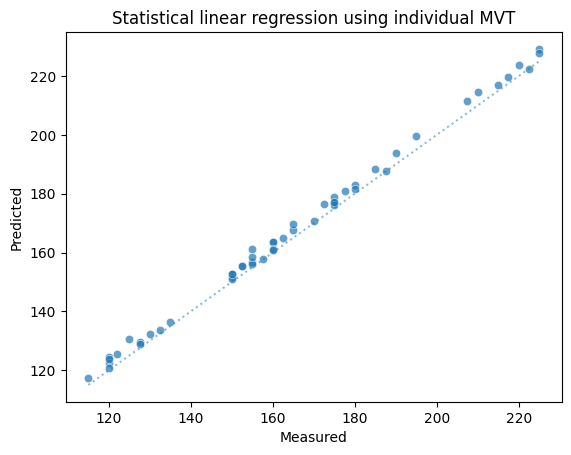

In [653]:
y_pred_stat, eval_statmodel1_fig = stat_modelling(df_sm2, model_name='Statistical linear regression using individual MVT');
eval_statmodel1_fig.figure.savefig('../output/figures/sm_model1.png')

## Model 2


Statistical linear regression with group MVT evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			5.22		3.00		2.22
MAE: 			4.41		2.65		1.75
mean error: 		2.58		2.65		-0.06
R^2: 			0.97		0.99		-0.02
Pearson r statistic: 	0.99		1.00		-0.01
			p=0.00		p=0.00

predictions mean: 	166.81		166.87		-0.06
predictions std: 	30.09		30.84		-0.74

target mean: 164.22
target std: 30.73


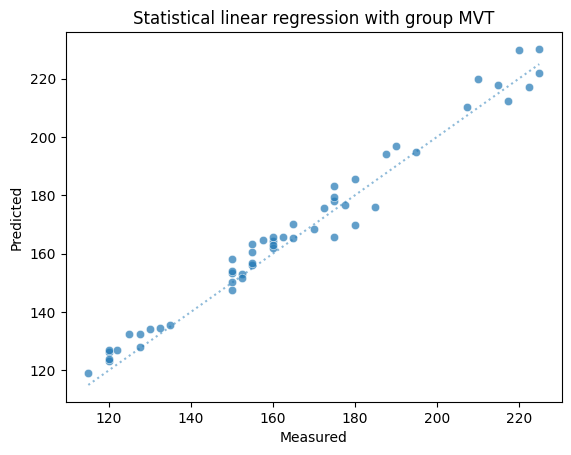

In [662]:
y_pred_stat2, eval_statmodel2_fig = stat_modelling(df_sm2, model_name='Statistical linear regression with group MVT', mvt='group');
eval_statmodel2_fig.figure.savefig('../output/figures/sm_model2.png')

## Model 3


Smith machine: OLS linear Regression evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			4.41		3.00		1.41
MAE: 			3.42		2.65		0.76
mean error: 		-0.00		2.65		-2.65
R^2: 			0.98		0.99		-0.01
Pearson r statistic: 	0.99		1.00		-0.01
			p=0.00		p=0.00

predictions mean: 	164.22		166.87		-2.65
predictions std: 	30.11		30.84		-0.73

target mean: 164.22
target std: 30.73

Model feature coefficients
	LV slope: 0.40214168797262795
	LV intercept: 1.1251217346212063
	model intercept:  -5.241220036533235


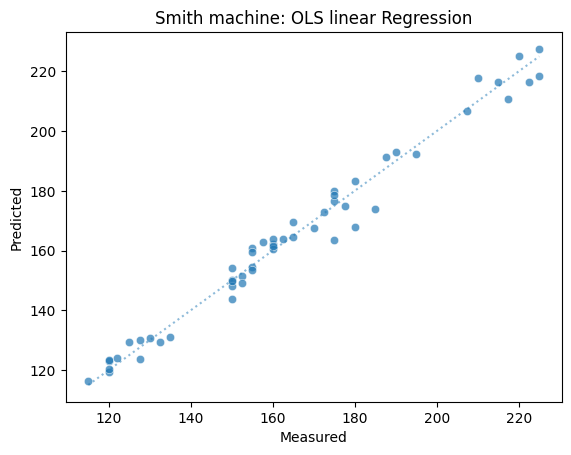

In [656]:
model3 = LinearRegression()
y_pred3, eval_fig3, model3_attributes =  model_data_vs_stat(df_sm2, ['slope', 'intercept'], model3, 
    model_name='Smith machine: OLS linear Regression')
eval_fig3.figure.savefig('../output/figures/sm_model3.png')

## Model 1 and 2 features with machine learning


Smith Machine: OLS linear regression including individual MVT evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			1.53		3.00		-1.47
MAE: 			1.26		2.65		-1.39
mean error: 		-0.00		2.65		-2.65
R^2: 			1.00		0.99		0.01
Pearson r statistic: 	1.00		1.00		-0.00
			p=0.00		p=0.00

predictions mean: 	164.22		166.87		-2.65
predictions std: 	30.39		30.84		-0.45

target mean: 164.22
target std: 30.73

Model feature coefficients
	LV slope: 0.26634714971561224
	LV intercept: 0.9998028152123917
	LV 100%MV: -165.44361793353607
	model intercept:  41.45242871849918


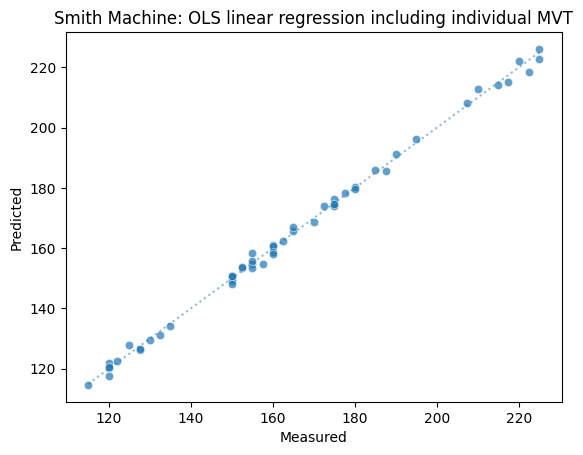

In [657]:
model1_ml = LinearRegression()
y_pred1_ml, eval_fig1_ml, model1_ml_attributes = model_data_vs_stat(df_sm2, x_columns=['slope', 'intercept', '100%MV'], 
    model=model1_ml, model_name='Smith Machine: OLS linear regression including individual MVT')
eval_fig1_ml.figure.savefig('../output/figures/sm_model1_ml.png')
# Using individual MVT improves predictinos compared to without on training test set


Smith machine: OLS linear regression including group MVT evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			4.41		3.00		1.41
MAE: 			3.42		2.65		0.76
mean error: 		0.00		2.65		-2.65
R^2: 			0.98		0.99		-0.01
Pearson r statistic: 	0.99		1.00		-0.01
			p=0.00		p=0.00

predictions mean: 	164.22		166.87		-2.65
predictions std: 	30.11		30.84		-0.73

target mean: 164.22
target std: 30.73

Model feature coefficients
	LV slope: 0.40214168797262845
	LV intercept: 1.1251217346212063
	LV group MVT: 6.313246033743667e-34
	model intercept:  -5.24122003653315


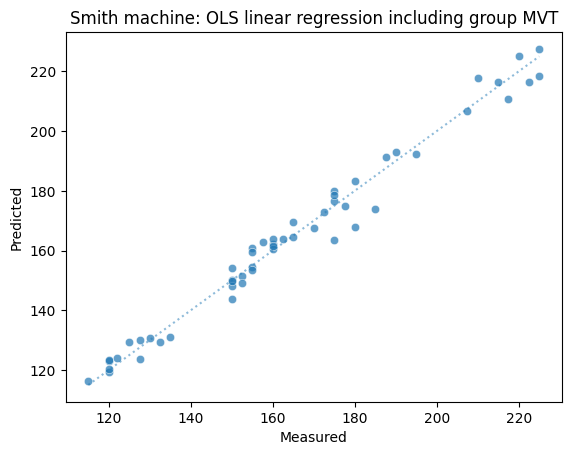

In [659]:
model2_ml = LinearRegression()
y_pred2_ml, eval_fig2_ml, model2_ml_attributes = model_data_vs_stat(df_sm2, x_columns=['slope', 'intercept', 'group MVT'], 
    model=model2_ml, model_name='Smith machine: OLS linear regression including group MVT')
eval_fig2_ml.figure.savefig('../output/figures/sm_model2_ml.png')
# Using group MVT did not improve evaluation metrics

## Model 4

### without hyperparameter tuning


Smith machine: Lasso regression (no CV) evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			4.42		3.00		1.41
MAE: 			3.41		2.65		0.76
mean error: 		0.00		2.65		-2.65
R^2: 			0.98		0.99		-0.01
Pearson r statistic: 	0.99		1.00		-0.01
			p=0.00		p=0.00

predictions mean: 	164.22		166.87		-2.65
predictions std: 	30.06		30.84		-0.78

target mean: 164.22
target std: 30.73

Model feature coefficients
	LV slope: 0.36563362186556175
	LV intercept: 1.0947335816468138
	model intercept:  -4.740837228619995


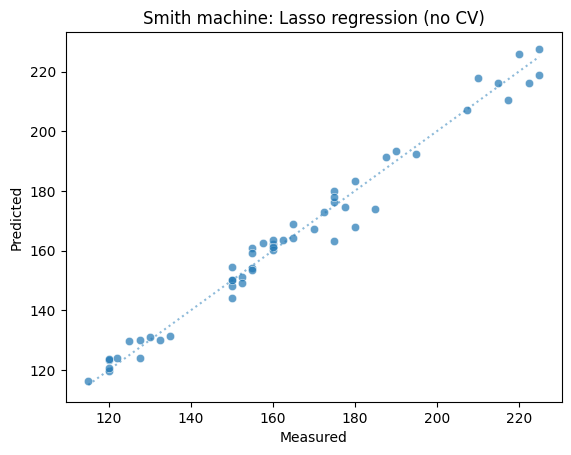

In [660]:

model4 = linear_model.Lasso()
y_pred4, eval_fig4, model4_attributes =  model_data_vs_stat(df_sm2, 
    ['slope', 'intercept'], model4, model_name='Smith machine: Lasso regression (no CV)')

In [487]:
model4_attributes

{'LV slope': 0.36563362186556175,
 'LV intercept': 1.0947335816468138,
 'model intercept': -4.740837228619995}

### Model 4 with Cross Validation


Smith machine: Lasso regression with CV evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			4.42		3.00		1.42
MAE: 			3.41		2.65		0.76
mean error: 		-0.00		2.65		-2.65
R^2: 			0.98		0.99		-0.01
Pearson r statistic: 	0.99		1.00		-0.01
			p=0.00		p=0.00

predictions mean: 	164.22		166.87		-2.65
predictions std: 	30.05		30.84		-0.78

target mean: 164.22
target std: 30.73

Model feature coefficients
	LV slope: 0.3611535848586901
	LV intercept: 1.0910027187054636
	model intercept:  -4.679055373112561


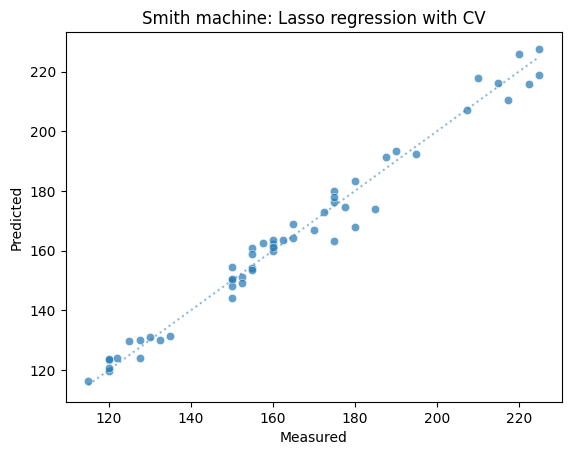

In [666]:

model4cv = LassoCV(cv=5, random_state=0)
y_pred4cv, eval_fig4cv, model4cv_attributes =  model_data_vs_stat(df_sm2, 
    ['slope', 'intercept'], model4cv, model_name='Smith machine: Lasso regression with CV')
eval_fig4cv.figure.savefig('../output/figures/sm_model4cv.png')

In [500]:
print(f'Model alpha: {model4cv.alpha_}')
print(f'Alphas used in CV: {model4cv.alphas_}')
print(f'Iterations: {model4cv.n_iter_}')

Model alpha: 1.1252831163472083
Alphas used in CV: [1.12528312e+03 1.04944280e+03 9.78713868e+02 9.12751829e+02
 8.51235411e+02 7.93864993e+02 7.40361149e+02 6.90463286e+02
 6.43928371e+02 6.00529754e+02 5.60056059e+02 5.22310155e+02
 4.87108198e+02 4.54278736e+02 4.23661870e+02 3.95108478e+02
 3.68479489e+02 3.43645204e+02 3.20484668e+02 2.98885074e+02
 2.78741220e+02 2.59954995e+02 2.42434898e+02 2.26095597e+02
 2.10857511e+02 1.96646420e+02 1.83393110e+02 1.71033028e+02
 1.59505974e+02 1.48755806e+02 1.38730162e+02 1.29380213e+02
 1.20660420e+02 1.12528312e+02 1.04944280e+02 9.78713868e+01
 9.12751829e+01 8.51235411e+01 7.93864993e+01 7.40361149e+01
 6.90463286e+01 6.43928371e+01 6.00529754e+01 5.60056059e+01
 5.22310155e+01 4.87108198e+01 4.54278736e+01 4.23661870e+01
 3.95108478e+01 3.68479489e+01 3.43645204e+01 3.20484668e+01
 2.98885074e+01 2.78741220e+01 2.59954995e+01 2.42434898e+01
 2.26095597e+01 2.10857511e+01 1.96646420e+01 1.83393110e+01
 1.71033028e+01 1.59505974e+01 1.4

## With Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
sm_train, sm_test = train_test_split(df_sm2, train_size=.8, random_state=0)
print(sm_train.shape)
print(sm_test.shape)

(41, 18)
(11, 18)


#### Model 3


Model 3 evaluation metrics: 
		Test data	Training data		Difference
RMSE: 			7.67		42.38		-34.72
MAE: 			6.29		5.27		1.02
mean error: 		2.21		-0.00		2.21
R^2: 			0.90		0.96		-0.06
Pearson r statistic: 	0.96		0.98		-0.01
			p=0.00		p=0.00

predictions mean: 	179.26		160.78		18.48
predictions std: 	19.78		30.30		-10.52

target mean: 		177.05		160.78		16.26
target std: 		25.44		31.38		-5.94

Model feature coefficients
	LV slope: 26568.77264884869
	LV intercept: 129.90868103894945
	model intercept:  167.08196225760605


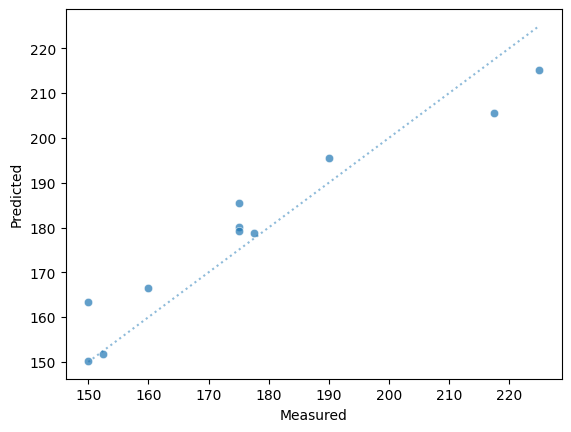

In [542]:
model3_tts = LinearRegression()
y_pred3_train, y_pred3_test, model3_tts_features, eval_fig3_test = model_data(sm_train, sm_test, 
    x_columns=['slope', 'intercept'], model=model3_tts, model_name='Model 3')
eval_fig3_test.figure.savefig('../output/figures/sm_model3_test.png')

In [484]:
model3_tts_features

{'LV slope': 26568.77264884869,
 'LV intercept': 129.90868103894945,
 'model intercept': 167.08196225760605}

In [461]:
# See if model predictions are same as when calculated using coefficients and intercept
df_test3 = sm_test[['Load-1RM-1', 'slope', 'intercept', '100%MV']].copy()
df_test3['model prediction'] = y_pred3_test
df_test3['arithmetic prediction'] = df_test3['slope']*model3_tts_attributes[1][0] + df_test3['intercept']*model3_tts_attributes[1][1] + model3_tts_attributes[2]
df_test3
# yes it does!

Load-1RM-1     slope  intercept  100%MV  model prediction  \
28       225.0 -0.004318   1.253193    0.26        215.155231   
37       217.5 -0.004938   1.306694    0.22        205.627784   
11       160.0 -0.006691   1.364175    0.27        166.534130   
34       150.0 -0.006140   1.227018    0.30        163.340607   
2        150.0 -0.007179   1.338281    0.24        150.200423   
30       152.5 -0.007329   1.381230    0.24        151.780188   
40       175.0 -0.006262   1.380596    0.27        180.068966   
32       177.5 -0.006057   1.329036    0.23        178.818060   
26       175.0 -0.006189   1.359053    0.25        179.187978   
4        175.0 -0.005450   1.256561    0.29        185.530374   
10       190.0 -0.004933   1.228374    0.27        195.600995   

    arithmetic prediction  
28             215.155231  
37             205.627784  
11             166.534130  
34             163.340607  
2              150.200423  
30             151.780188  
40             180.068966  
32             178.818060  
26             179.187978  
4              185.530374  
10             195.600995

#### Model 1


Model 1 evaluation metrics: 
		Test data	Training data		Difference
RMSE: 			6.10		35.32		-29.22
MAE: 			5.18		4.67		0.51
mean error: 		1.45		-0.00		1.45
R^2: 			0.94		0.96		-0.03
predictions mean: 	178.50		160.78		17.72
predictions std: 	19.78		30.42		-10.64

Pearson correlation coefficient (r) for predicted and true values: 0.98 (p-value of 0.00).

target mean: 177.05
target std: 25.44
Model features: ['slope' 'intercept' '100%MV']
Coefficients:  [26023.01720565   123.09311247  -103.66078291]
Y-intercept:  198.77391947388946


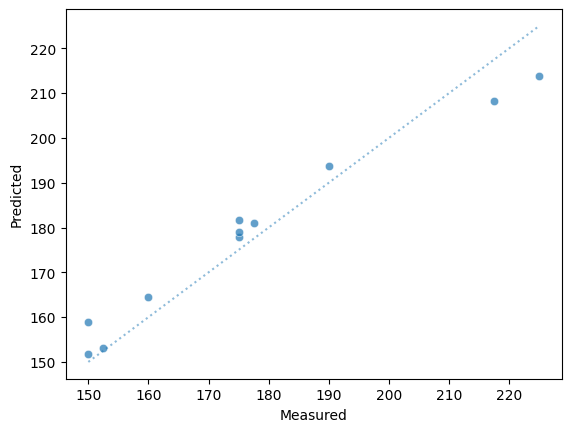

In [443]:
model1_tts = LinearRegression()
y_pred1_train, y_pred1_test, model1_tts_attributes, eval_fig1_test = model_data(sm_train, sm_test, 
    x_columns=['slope', 'intercept', '100%MV'], model=model1_tts, model_name='Model 1')
eval_fig1_test.figure.savefig('../output/figures/sm_model1_test_split.png')
# Including MVT improves predictions

#### Model 4 with Cross Validation


Model 4 with CV and train test split evaluation metrics: 
		Test data	Training data		Difference
RMSE: 			7.67		42.38		-34.72
MAE: 			6.29		5.27		1.02
mean error: 		2.21		-0.00		2.21
R^2: 			0.90		0.96		-0.06
predictions mean: 	179.26		160.78		18.48
predictions std: 	19.78		30.30		-10.52
target mean: 		177.05		160.78		16.26
target std: 		25.44		31.38		-5.94

Pearson correlation coefficient (r) for predicted and true values: 0.96 (p-value of 0.00).

Model feature coefficients
	LV slope: 26568.77264884869
	LV intercept: 129.90868103894945
	model intercept:  167.08196225760605


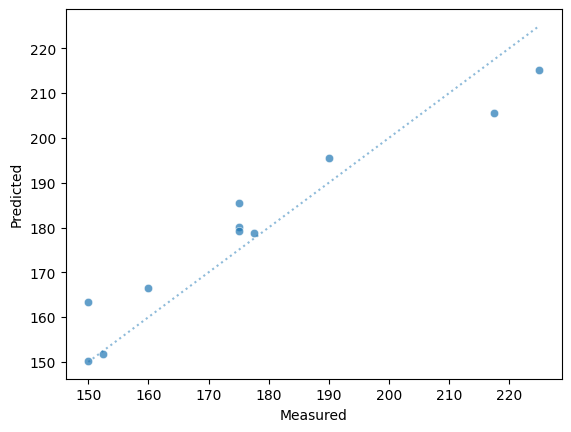

In [506]:
model4cv_tts = LassoCV(cv=5, random_state=0)
y_pred4_train, y_pred4_test, model4_tts_attributes, eval_fig4_test = model_data(sm_train, sm_test, 
    x_columns=['slope', 'intercept'], model=model3_tts, model_name='Model 4 with CV and train test split')
eval_fig4_test.figure.savefig('../output/figures/sm_model4_test.png')

# Free weight

## Model 1


Free Weight: Statistical linear regression using individual MVT evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			3.57		3.57		0.00
MAE: 			3.04		3.04		0.00
mean error: 		2.56		2.56		0.00
R^2: 			0.98		0.98		0.00
Pearson r statistic: 	1.00		1.00		0.00
			p=0.00		p=0.00

predictions mean: 	138.84		138.84		0.00
predictions std: 	28.21		28.21		0.00

target mean: 136.28
target std: 27.07


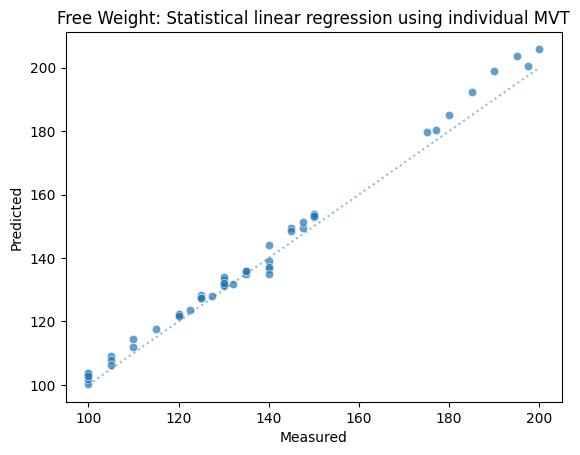

In [654]:
fw_y_pred_stat, fw_eval_statmodel1_fig = stat_modelling(df_fw2, 
    model_name='Free Weight: Statistical linear regression using individual MVT');
fw_eval_statmodel1_fig.figure.savefig('../output/figures/fw_model1.png')

## Model 2


Free Weight: Statistical linear regression with group MVT evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			3.79		3.57		0.22
MAE: 			3.23		3.04		0.19
mean error: 		2.54		2.56		-0.02
R^2: 			0.98		0.98		-0.00
Pearson r statistic: 	1.00		1.00		-0.00
			p=0.00		p=0.00

predictions mean: 	138.82		138.84		-0.02
predictions std: 	27.89		28.21		-0.32

target mean: 136.28
target std: 27.07


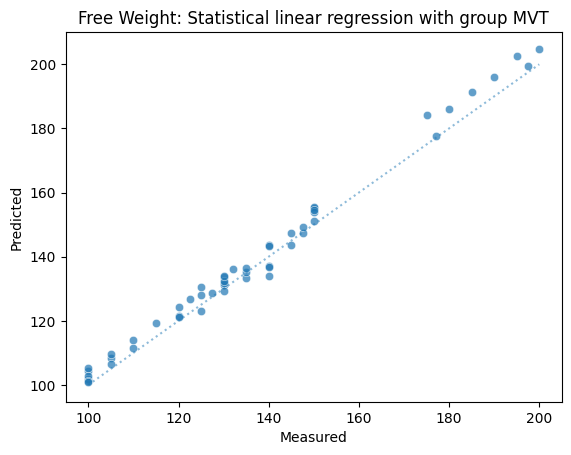

In [649]:
fw_y_pred_stat2, fw_eval_statmodel2_fig = stat_modelling(df_fw2, model_name='Free Weight: Statistical linear regression with group MVT', mvt='group');
fw_eval_statmodel2_fig.figure.savefig('../output/figures/fw_model2.png')

## Model 3


Free weight: OLS linear Regression evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			2.51		3.57		-1.06
MAE: 			2.02		3.04		-1.03
mean error: 		-0.00		2.56		-2.56
R^2: 			0.99		0.98		0.01
Pearson r statistic: 	1.00		1.00		-0.00
			p=0.00		p=0.00

predictions mean: 	136.28		138.84		-2.56
predictions std: 	26.69		28.21		-1.52

target mean: 136.28
target std: 27.07

Model feature coefficients
	LV slope: 0.42120300024549373
	LV intercept: 1.0840162420367898
	model intercept:  2.535853026700181


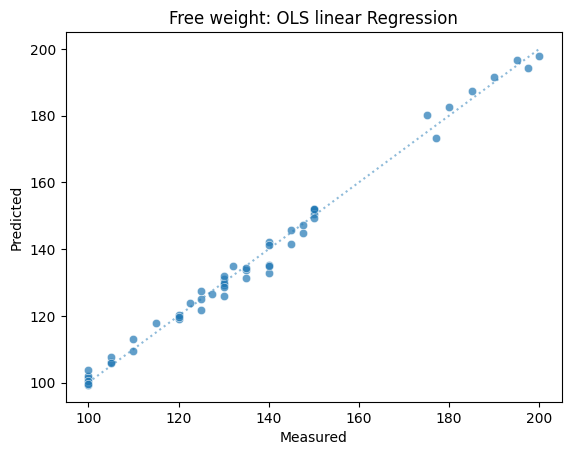

In [663]:
fw_model3 = LinearRegression()
fw_y_pred3, fw_eval_fig3, fw_model3_attributes =  model_data_vs_stat(df_fw2, ['slope', 'intercept'], 
    fw_model3, model_name='Free weight: OLS linear Regression')
fw_eval_fig3.figure.savefig('../output/figures/fw_model3.png')

## Model 4

### without hyperparameter tuning


Free weight: Lasso regression (no CV) evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			2.53		3.57		-1.04
MAE: 			2.02		3.04		-1.02
mean error: 		0.00		2.56		-2.56
R^2: 			0.99		0.98		0.01
Pearson r statistic: 	1.00		1.00		-0.00
			p=0.00		p=0.00

predictions mean: 	136.28		138.84		-2.56
predictions std: 	26.63		28.21		-1.58

target mean: 136.28
target std: 27.07

Model feature coefficients
	LV slope: 0.35587183146967105
	LV intercept: 1.0330025146112882
	model intercept:  2.629416245308761


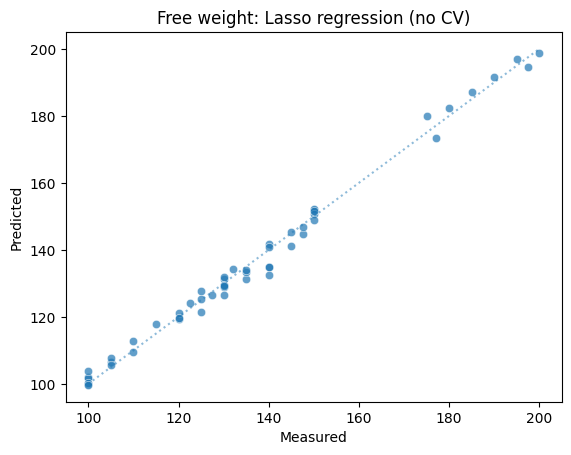

In [664]:
fw_model4 = linear_model.Lasso()
fw_y_pred4, fw_eval_fig4, fw_model4_attributes =  model_data_vs_stat(df_fw2, 
    ['slope', 'intercept'], fw_model4, model_name='Free weight: Lasso regression (no CV)')

### Model 4 with Cross Validation


Free weight: Lasso regression with CV evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			2.53		3.57		-1.04
MAE: 			2.02		3.04		-1.02
mean error: 		0.00		2.56		-2.56
R^2: 			0.99		0.98		0.01
Pearson r statistic: 	1.00		1.00		-0.00
			p=0.00		p=0.00

predictions mean: 	136.28		138.84		-2.56
predictions std: 	26.64		28.21		-1.57

target mean: 136.28
target std: 27.07

Model feature coefficients
	LV slope: 0.3603266338084118
	LV intercept: 1.0364822926717228
	model intercept:  2.6228153358737814


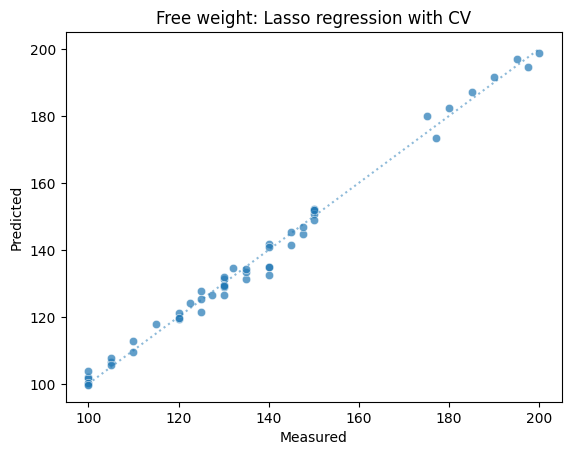

In [667]:
fw_model4cv = LassoCV(cv=5, random_state=0)
fw_y_pred4cv, fw_eval_fig4cv, fw_model4cv_attributes =  model_data_vs_stat(df_fw2, 
    ['slope', 'intercept'], fw_model4cv, model_name='Free weight: Lasso regression with CV')
fw_eval_fig4cv.figure.savefig('../output/figures/fw_model4cv.png')

In [668]:
print(f'Model alpha: {model4cv.alpha_}')
print(f'Iterations: {model4cv.n_iter_}')

Model alpha: 1.1252831163472083
Iterations: 130


# Neural Network

## `build_nn` function

In [589]:
print(sm_train.shape)
sm_train.head()

(41, 18)


Age  Mass  Height  Load20%1RM  Load40%1RM  Load60%1RM  Load80%1RM  \
22  19.0  57.9   174.0        24.0        48.0        72.0        96.0   
31  18.0  60.7   173.0        25.5        51.0        76.5       102.0   
29  23.0  73.4   176.0        32.5        65.0        97.5       130.0   
42  22.0  83.8   184.0        41.5        83.0       124.5       166.0   
43  21.0  72.8   175.0        31.0        62.0        93.0       124.0   

    Load90%1RM  Load-1RM-1  20% MV  40%MV  60%MV  80%MV  90%MV  100%MV  \
22       108.0       120.0    1.07   0.89   0.69   0.54   0.42    0.28   
31       115.0       127.5    1.10   0.96   0.76   0.53   0.38    0.28   
29       146.0       162.5    1.09   0.96   0.75   0.52   0.36    0.26   
42       187.0       207.5    1.02   0.85   0.70   0.47   0.36    0.25   
43       139.5       155.0    1.04   0.95   0.76   0.54   0.41    0.27   

       slope  intercept  group MVT  
22 -0.007974   1.270281   0.255577  
31 -0.008256   1.352929   0.255577  
29 -0.006599   1.353419   0.255577  
42 -0.004649   1.235561   0.255577  
43 -0.006323   1.298667   0.255577

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_35 (Normaliza  (None, 2)                5         
 tion)                                                           
                                                                 
 dense_67 (Dense)            (None, 10)                30        
                                                                 
 dense_68 (Dense)            (None, 1)                 11        
                                                                 
Total params: 46
Trainable params: 41
Non-trainable params: 5
_________________________________________________________________
None
2/2 [==============================] - 0s 6ms/step

Neural network evaluation metrics: 
		Test data	Training data		Difference
RMSE: 			32.09		982.96		-950.88
MAE: 			23.84		24.44		-0.59
mean error: 		-21.00		-4.74		-16.26
R^2: 			-0.75		-0.02		-0.73


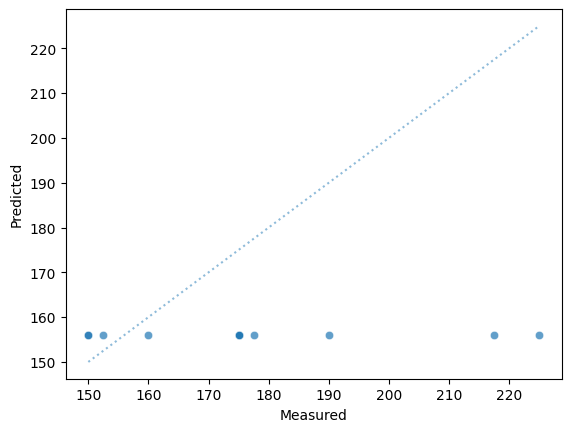

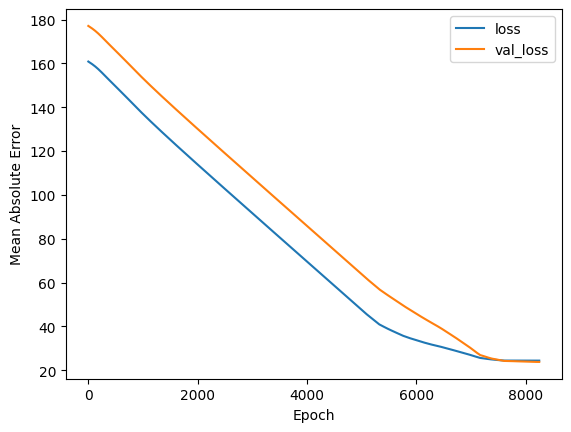

In [583]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Normalization
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping 
import matplotlib.pyplot as plt

def build_nn(df_train, df_test, x_columns, epochs=2, normalize=True):
    X_train = df_train[x_columns]
    X_test = df_test[x_columns]
    y_train = df_train['Load-1RM-1']
    y_test = df_test['Load-1RM-1']

    model = Sequential()
    if normalize:
        model.add(Normalization())
    model.add(Dense(10, activation='sigmoid', input_shape=(X_test.shape[1],))) # Outputs to 10 hidden neurons
    model.add(Dense(1))
    model.compile(
        loss='mean_absolute_error',
        optimizer='adam',
        metrics=['mean_absolute_error', 
            # RootMeanSquaredError()
            ]
    )
    history = model.fit(
        X_train,
        y_train, 
        epochs=epochs,
        validation_data=(X_test, y_test),
        callbacks=[EarlyStopping(patience=50)],
        verbose=0
    )
    print(model.summary())
    metrics = model.evaluate(X_test, y_test)
    metrics_train = model.evaluate(X_train, y_train)
    y_pred = model.predict(X_test).flatten()
    y_pred_train = model.predict(X_train).flatten()

    fig = evaluate_regression(y_test, y_pred, y_train, y_pred_train, model_name='Neural network')

    # Plot the metrics history
    fig2, ax = plt.subplots(nrows=1 ,ncols=1)
    sns.lineplot(history.history['loss'], label='loss', ax=ax)
    sns.lineplot(history.history['val_loss'], label='val_loss', ax=ax)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Mean Absolute Error')
    # ax.grid(True)

    return model, y_pred_train, y_pred, history, fig, fig2

model5, y_pred5_train, y_pred5_test, model5_history, eval_fig5_test, model5_history_test = build_nn(sm_train, sm_test, 
    x_columns=['slope', 'intercept'], epochs=10000, normalize=True)
eval_fig5_test.figure.savefig('../output/figures/sm_model5_test.png')
model5_history_test.figure.savefig('../output/figures/sm_model5_history_test.png')

In [584]:
y_pred5_test

array([156.04332, 156.04367, 156.04393, 156.04314, 156.04382, 156.04399,
       156.04399, 156.04378, 156.04391, 156.04337, 156.04315],
      dtype=float32)

# *End of Page*